Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

Load dataset

In [2]:
file_path = '../data/WHO-COVID-19-global-data.csv'
date_column = 'Date_reported'
target_column = 'New_deaths'
df = pd.read_csv(file_path, parse_dates=True)[[date_column, target_column]]
df[date_column] = pd.to_datetime(df[date_column], format='%Y-%m-%d')

df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)

Create model

In [3]:
model = AutoTS(
    forecast_length=15,
    frequency='D',
    prediction_interval=0.95,
    ensemble=None,
    models_mode='gradient_boosting',
    model_list = 'univariate',
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list='fast',
    n_jobs='auto')

Using 6 cpus for n_jobs.


In [4]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [5]:
print(model_lists['univariate'])

['ConstantNaive', 'MLEnsemble', 'DatepartRegression', 'ETS', 'AverageValueNaive', 'ARIMA', 'ARDL', 'MetricMotif', 'GLM', 'PreprocessingRegression', 'FFT', 'SeasonalNaive', 'UnivariateMotif', 'GLS', 'NeuralProphet', 'UnivariateRegression', 'KalmanStateSpace', 'FBProphet', 'SeasonalityMotif', 'Theta', 'UnobservedComponents', 'LastValueNaive', 'ARCH']


Train test split, fit and prediction

In [6]:
train = df.iloc[:-30]
test = df.iloc[-30:]
model.fit(train[target_column])
prediction = model.predict(forecast_length=30)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.92913D+00    |proj g|=  5.16054D-02


 This problem is unconstrained.



At iterate    1    f=  8.92246D+00    |proj g|=  4.26323D-02

At iterate    2    f=  8.91960D+00    |proj g|=  1.61929D-02

At iterate    3    f=  8.91818D+00    |proj g|=  1.39183D-02

At iterate    4    f=  8.91546D+00    |proj g|=  1.76335D-02

At iterate    5    f=  8.91135D+00    |proj g|=  4.67349D-02

At iterate    6    f=  8.90542D+00    |proj g|=  4.11628D-02

At iterate    7    f=  8.90060D+00    |proj g|=  1.10752D-01

At iterate    8    f=  8.89203D+00    |proj g|=  3.06652D-02

At iterate    9    f=  8.88972D+00    |proj g|=  2.13023D-02

At iterate   10    f=  8.88805D+00    |proj g|=  2.78085D-02

At iterate   11    f=  8.88631D+00    |proj g|=  2.84820D-02

At iterate   12    f=  8.88460D+00    |proj g|=  1.40844D-02

At iterate   13    f=  8.88369D+00    |proj g|=  1.74542D-02

At iterate   14    f=  8.88327D+00    |proj g|=  1.99617D-02

At iterate   15    f=  8.88289D+00    |proj g|=  1.14256D-02

At iterate   16    f=  8.88224D+00    |proj g|=  1.11909D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 8 in generation 0: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 5
Model Number: 10 with model ETS in generation 0 of 5
Model Number: 11 with model GLM in generation 0 of 5
Model Number: 12 with model GLM in generation 0 of 5
Model Number: 13 with model GLS in generation 0 of 5
Model Number: 14 with model GLS in generation 0 of 5
Model Number: 15 with model LastValueNaive in generation 0 of 5
Model Number: 16 with model LastValueNaive in generation 0 of 5
Model Number: 17 with model LastValueNaive in generation 0 of 5
Model Number: 18 with model LastValueNaive in generation 0 of 5
Model Number: 19 with model SeasonalNaive in generation 0 of 5
Model Number: 20 with model SeasonalNaive in generation 0 of 5
Model Number: 21 with model SeasonalNaive in generation 0 of 5
Model Number: 22 with mod

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 44 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 2 and the array at index 1 has size 21') in model 44 in generation 0: MLEnsemble
Model Number: 45 with model DatepartRegression in generation 0 of 5
Model Number: 46 with model ETS in generation 0 of 5
Model Number: 47 with model AverageValueNaive in generation 0 of 5
Model Number: 48 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28830D+00    |proj g|=  1.15313D-01


 This problem is unconstrained.



At iterate    1    f=  8.26994D+00    |proj g|=  5.61982D-02

At iterate    2    f=  8.26406D+00    |proj g|=  4.22799D-02

At iterate    3    f=  8.25457D+00    |proj g|=  3.96867D-02

At iterate    4    f=  8.25129D+00    |proj g|=  2.89689D-02

At iterate    5    f=  8.24984D+00    |proj g|=  1.90919D-02

At iterate    6    f=  8.24911D+00    |proj g|=  1.17581D-02

At iterate    7    f=  8.24808D+00    |proj g|=  2.18226D-02

At iterate    8    f=  8.24737D+00    |proj g|=  1.54656D-02

At iterate    9    f=  8.24654D+00    |proj g|=  8.96205D-03

At iterate   10    f=  8.24612D+00    |proj g|=  1.21135D-02

At iterate   11    f=  8.24566D+00    |proj g|=  1.36057D-02

At iterate   12    f=  8.24522D+00    |proj g|=  9.15944D-03

At iterate   13    f=  8.24484D+00    |proj g|=  6.33921D-03

At iterate   14    f=  8.24451D+00    |proj g|=  6.90071D-03

At iterate   15    f=  8.24417D+00    |proj g|=  4.81877D-03

At iterate   16    f=  8.24404D+00    |proj g|=  3.49408D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 49 with model ARDL in generation 0 of 5
Model Number: 50 with model MetricMotif in generation 0 of 5
Model Number: 51 with model GLM in generation 0 of 5
Model Number: 52 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52 in generation 0: PreprocessingRegression
Model Number: 53 with model FFT in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 54 with model SeasonalNaive in generation 0 of 5
Model Number: 55 with model UnivariateMotif in generation 0 of 5
Model Number: 56 with model GLS in generation 0 of 5
Model Number: 57 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 57 in generation 0: NeuralProphet
Model Number: 58 with model UnivariateRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 59 with model KalmanStateSpace in generation 0 of 5
Model Number: 60 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 60 in generation 0: FBProphet
Model Number: 61 with model SeasonalityMotif in generation 0 of 5
Model Number: 62 with model Theta in generation 0 of 5
Model Number: 63 with model UnobservedComponents in generation 0 of 5
Model Number: 64 with model LastValueNaive in generation 0 of 5
Model Number: 65 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 65 in generation 0: ARCH
Model Number: 66 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 66 in generation 0: MLEnsemble
Model Number: 

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 68 in generation 0: UnivariateRegression
Model Number: 69 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: DatepartRegression
Model Number: 70 with model GLM in generation 0 of 5
Model Number: 71 with model LastValueNaive in generation 0 of 5
Model Number: 72 with model GLM in generation 0 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 72 in generation 0: GLM
Model Number: 73 with model SeasonalityMotif in generation 0 of 5
Model Number: 74 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.331e+09, tolerance: 2.926e+06
  model = cd_fast.enet_coordinate_descent(
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 74 in generation 0: GLM
Model Number: 75 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 75 in generation 0: ARCH
Model Number: 76 with model MetricMotif in generation 0 of 5
Model Number: 77 with model FFT in generation 0 of 5
Model Number: 78 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 78 in generation 0: MLEnsemble
Model Number: 79 with model ARDL in generation 0 of 5
Model Number: 80 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 80 in generati

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Model Number: 97 with model AverageValueNaive in generation 0 of 5
Model Number: 98 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 98 in generation 0: ARCH
Model Number: 99 with model SeasonalNaive in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 99 in generation 0: SeasonalNaive
Model Number: 100 with model ConstantNaive in generation 0 of 5
Model Number: 101 with model UnivariateMotif in generation 0 of 5
Model Number: 102 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("loss='poisson' requires non-negative y and sum(y) > 0.") in model 102 in generation 0: PreprocessingRegression
Model Number: 103 with model ETS in generation 0 of 5
Model Number: 104 with model KalmanStateSpace in generation 0 of 5
Model Number: 105 with model MLEnsemble in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastVa

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 113 in generation 0: NeuralProphet
Model Number: 114 with model ARDL in generation 0 of 5
Model Number: 115 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 115 in generation 0: ARCH
Model Number: 116 with model Theta in generation 0 of 5
Model Number: 117 with model KalmanStateSpace in generation 0 of 5
Model Number: 118 with model SeasonalNaive in generation 0 of 5
Model Number: 119 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 119 in generation 0: ARIMA
Model Number: 120 with model UnivariateMotif in generation 0 of 5
Model Number: 121 with model DatepartRegression in generation 0 of 5
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 121 in generation 0: DatepartRegression
Mod

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53043D+02    |proj g|=  3.41197D+04

At iterate    1    f=  1.05912D+00    |proj g|=  7.44060D-01

At iterate    2    f= -7.52991D-01    |proj g|=  1.23791D+00
  ys=-1.868E-01  -gs= 1.031E+00 BFGS update SKIPPED

At iterate    3    f= -8.01974D-01    |proj g|=  1.05750D+00

At iterate    4    f= -9.06952D-01    |proj g|=  3.94367D+00

At iterate    5    f= -9.40013D-01    |proj g|=  4.83616D+00

At iterate    6    f= -9.79944D-01    |proj g|=  5.58999D+00

At iterate    7    f= -1.06034D+00    |proj g|=  6.55905D+00

At iterate    8    f= -1.30458D+00    |proj g|=  8.81913D+00

At iterate    9    f= -2.37732D+00    |proj g|=  2.48301D+00

At iterate   10    f= -2.42735D+00    |proj g|=  1.99822D+00

At iterate   11    f= -2.42753D+00    |proj g|=  8.24519D-01

At iterate   12    f= -2.45586D+00  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   63    f= -2.60561D+00    |proj g|=  2.46400D-03

At iterate   64    f= -2.60561D+00    |proj g|=  1.22429D-03

At iterate   65    f= -2.60561D+00    |proj g|=  1.22471D-03

At iterate   66    f= -2.60561D+00    |proj g|=  4.63426D-03

At iterate   67    f= -2.60561D+00    |proj g|=  9.56212D-03

At iterate   68    f= -2.60561D+00    |proj g|=  1.67188D-02

At iterate   69    f= -2.60561D+00    |proj g|=  3.05891D-02

At iterate   70    f= -2.60561D+00    |proj g|=  4.62943D-02

At iterate   71    f= -2.60561D+00    |proj g|=  7.75374D-02

At iterate   72    f= -2.60561D+00    |proj g|=  9.35994D-02

At iterate   73    f= -2.60561D+00    |proj g|=  8.92683D-02

At iterate   74    f= -2.60561D+00    |proj g|=  4.91280D-02

At iterate   75    f= -2.60561D+00    |proj g|=  1.09376D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    8    f=  9.16313D+00    |proj g|=  1.50562D-03

At iterate    9    f=  9.16305D+00    |proj g|=  5.12221D-04

At iterate   10    f=  9.16301D+00    |proj g|=  1.31788D-04

At iterate   11    f=  9.16299D+00    |proj g|=  2.94952D-04

At iterate   12    f=  9.16298D+00    |proj g|=  2.30129D-04

At iterate   13    f=  9.16296D+00    |proj g|=  1.02665D-04

At iterate   14    f=  9.16094D+00    |proj g|=  1.38682D-02

At iterate   15    f=  9.16024D+00    |proj g|=  2.41472D-02

At iterate   16    f=  9.15378D+00    |proj g|=  1.50834D-02

At iterate   17    f=  9.15087D+00    |proj g|=  5.59942D-04

At iterate   18    f=  9.15069D+00    |proj g|=  4.65565D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   22    f=  6.45952D+00    |proj g|=  7.53489D-03

At iterate   23    f=  6.45936D+00    |proj g|=  3.76606D-03

At iterate   24    f=  6.45927D+00    |proj g|=  5.00887D-03

At iterate   25    f=  6.45922D+00    |proj g|=  2.65561D-03

At iterate   26    f=  6.45919D+00    |proj g|=  1.51737D-03

At iterate   27    f=  6.45918D+00    |proj g|=  3.49184D-03

At iterate   28    f=  6.45917D+00    |proj g|=  1.60068D-03

At iterate   29    f=  6.45917D+00    |proj g|=  2.93947D-04

At iterate   30    f=  6.45917D+00    |proj g|=  2.94373D-04

At iterate   31    f=  6.45917D+00    |proj g|=  2.94613D-04

At iterate   32    f=  6.45916D+00    |proj g|=  7.35667D-04

At iterate   33    f=  6.45916D+00    |proj g|=  4.06822D-04

At iterate   34    f=  6.45914D+00    |proj g|=  1.00391D-03

At iterate   35    f=  6.45910D+00    |proj g|=  1.99983D-03

At iterate   36    f=  6.45903D+00    |proj g|=  5.49033D-03

At iterate   37    f=  6.45893D+00    |proj g|=  4.07270D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  5.81420D-01    |proj g|=  2.84579D-01

At iterate    2    f=  5.65177D-01    |proj g|=  9.74684D-02

At iterate    3    f=  5.61899D-01    |proj g|=  6.42532D-02

At iterate    4    f=  5.58952D-01    |proj g|=  5.01486D-02

At iterate    5    f=  5.57051D-01    |proj g|=  2.10051D-02

At iterate    6    f=  5.56170D-01    |proj g|=  1.81547D-02

At iterate    7    f=  5.55467D-01    |proj g|=  1.76245D-02

At iterate    8    f=  5.54402D-01    |proj g|=  2.36108D-02

At iterate    9    f=  5.53550D-01    |proj g|=  1.72317D-02

At iterate   10    f=  5.53024D-01    |proj g|=  1.29267D-02

At iterate   11    f=  5.52223D-01    |proj g|=  1.52352D-02

At iterate   12    f=  5.50948D-01    |proj g|=  2.65769D-02

At iterate   13    f=  5.48723D-01    |proj g|=  5.05307D-02

At iterate   14    f=  5.46891D-01    |proj g|=  8.70234D-02

At iterate   15    f=  5.44767D-01    |proj g|=  4.71876D-02

At iterate   16    f=  5.41774D-01    |proj g|=  2.91113D-02

At iter

 This problem is unconstrained.



At iterate   34    f=  1.54532D+01    |proj g|=  1.06996D-03

At iterate   35    f=  1.54531D+01    |proj g|=  3.15885D-03

At iterate   36    f=  1.54531D+01    |proj g|=  1.20720D-03

At iterate   37    f=  1.54531D+01    |proj g|=  4.91771D-04

At iterate   38    f=  1.54531D+01    |proj g|=  3.39065D-04

At iterate   39    f=  1.54531D+01    |proj g|=  1.03496D-03

At iterate   40    f=  1.54530D+01    |proj g|=  3.35811D-03

At iterate   41    f=  1.54530D+01    |proj g|=  2.72019D-04

At iterate   42    f=  1.54530D+01    |proj g|=  1.80423D-03

At iterate   43    f=  1.54530D+01    |proj g|=  1.62146D-03

At iterate   44    f=  1.54529D+01    |proj g|=  1.31089D-03

At iterate   45    f=  1.54529D+01    |proj g|=  1.72789D-03

At iterate   46    f=  1.54529D+01    |proj g|=  1.81960D-03

At iterate   47    f=  1.54529D+01    |proj g|=  3.83744D-03

At iterate   48    f=  1.54529D+01    |proj g|=  2.36453D-03

At iterate   49    f=  1.54529D+01    |proj g|=  1.73665D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 182 with model FFT in generation 1 of 5
Model Number: 183 with model UnivariateMotif in generation 1 of 5
Model Number: 184 with model SeasonalNaive in generation 1 of 5
Model Number: 185 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 186 with model Theta in generation 1 of 5
Model Number: 187 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 188 with model GLS in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 188 in generation 1: GLS
Model Number: 189 with model DatepartRegression in generation 1 of 5
Model Number: 190 with model SeasonalityMotif in generation 1 of 5
Model Number: 191 with model ARDL in generation 1 of 5
Model Number: 192 with model ARDL in generation 1 of 5
Model Number: 193 with model ConstantNaive in generation 1 of 5
Model Number: 194 with model UnobservedComponents in generation 1 of 5
Model Number: 195 with model UnivariateMotif in generation 1 of 5
Model Number: 196 with model ConstantNaive in generation 1 of 5
Model Number: 197 with model SeasonalityMotif in generation 1 of 5
Model Number: 198 with model UnivariateMotif in generation 1 of 5
Model Number: 199 with model ConstantNaive in generation 1 of 5
Model Number: 200 with model UnivariateMotif in generation 1 of 5
Model Number: 201 with model KalmanStateSpace in generation

 This problem is unconstrained.



At iterate    1    f=  6.68036D+00    |proj g|=  2.35010D-01

At iterate    2    f=  6.60758D+00    |proj g|=  6.03157D-02

At iterate    3    f=  6.60338D+00    |proj g|=  4.77795D-02

At iterate    4    f=  6.59965D+00    |proj g|=  3.19991D-02

At iterate    5    f=  6.59687D+00    |proj g|=  2.48883D-02

At iterate    6    f=  6.59406D+00    |proj g|=  2.01275D-02

At iterate    7    f=  6.58908D+00    |proj g|=  4.48166D-02

At iterate    8    f=  6.58406D+00    |proj g|=  2.89918D-02

At iterate    9    f=  6.58200D+00    |proj g|=  1.59809D-02

At iterate   10    f=  6.58024D+00    |proj g|=  1.70080D-02

At iterate   11    f=  6.57718D+00    |proj g|=  1.40393D-02

At iterate   12    f=  6.57463D+00    |proj g|=  2.20233D-02

At iterate   13    f=  6.57375D+00    |proj g|=  2.51959D-02

At iterate   14    f=  6.57225D+00    |proj g|=  1.27192D-02

At iterate   15    f=  6.57134D+00    |proj g|=  1.40231D-02

At iterate   16    f=  6.56997D+00    |proj g|=  1.46383D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 217 with model UnobservedComponents in generation 1 of 5
Model Number: 218 with model ETS in generation 1 of 5
Model Number: 219 with model ARDL in generation 1 of 5
Model Number: 220 with model GLS in generation 1 of 5
Model Number: 221 with model SeasonalNaive in generation 1 of 5
Model Number: 222 with model LastValueNaive in generation 1 of 5
Model Number: 223 with model MetricMotif in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 223 in generation 1: MetricMotif
Model Number: 224 with model ARDL in generation 1 of 5
Model Number: 225 with model SeasonalityMotif in generation 1 of 5
Model Number: 226 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33852D+00    |proj g|=  1.65635D-01


 This problem is unconstrained.



At iterate    1    f=  8.31311D+00    |proj g|=  6.48018D-02

At iterate    2    f=  8.30713D+00    |proj g|=  3.55651D-02

At iterate    3    f=  8.29869D+00    |proj g|=  3.77220D-02

At iterate    4    f=  8.29514D+00    |proj g|=  2.20154D-02

At iterate    5    f=  8.29359D+00    |proj g|=  2.34525D-02

At iterate    6    f=  8.29321D+00    |proj g|=  2.01089D-02

At iterate    7    f=  8.29295D+00    |proj g|=  7.46598D-03

At iterate    8    f=  8.29271D+00    |proj g|=  8.25914D-03

At iterate    9    f=  8.29120D+00    |proj g|=  3.68155D-02

At iterate   10    f=  8.28913D+00    |proj g|=  4.12193D-02

At iterate   11    f=  8.28722D+00    |proj g|=  4.33692D-02

At iterate   12    f=  8.28557D+00    |proj g|=  3.73328D-02

At iterate   13    f=  8.28430D+00    |proj g|=  3.03160D-02

At iterate   14    f=  8.28168D+00    |proj g|=  1.13511D-02

At iterate   15    f=  8.28100D+00    |proj g|=  1.10096D-02

At iterate   16    f=  8.28066D+00    |proj g|=  8.06323D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 227 with model Theta in generation 1 of 5
Model Number: 228 with model MetricMotif in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 228 in generation 1: MetricMotif
Model Number: 229 with model LastValueNaive in generation 1 of 5
Model Number: 230 with model ETS in generation 1 of 5
Model Number: 231 with model SeasonalNaive in generation 1 of 5
Model Number: 232 with model UnivariateMotif in generation 1 of 5
Model Number: 233 with model UnivariateMotif in generation 1 of 5
Model Number: 234 with model GLM in generation 1 of 5
Model Number: 235 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 235 in generation 1: UnivariateRegression
Model Number: 236 with model GLS in generation 1 of 5
Model Number: 237 with model UnobservedComponents in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 238 with model GLS in generation 1 of 5
Model Number: 239 with model AverageValueNaive in generation 1 of 5
Model Number: 240 with model DatepartRegression in generation 1 of 5
Model Number: 241 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26935D+01    |proj g|=  2.83953D+01

At iterate    1    f=  8.90477D+00    |proj g|=  2.92529D-01

At iterate    2    f=  8.89688D+00    |proj g|=  2.46275D-01

At iterate    3    f=  8.86613D+00    |proj g|=  1.73720D-01

At iterate    4    f=  8.85585D+00    |proj g|=  2.34069D-01


 This problem is unconstrained.



At iterate    5    f=  8.84454D+00    |proj g|=  1.87018D-01

At iterate    6    f=  8.81333D+00    |proj g|=  1.35560D-01

At iterate    7    f=  8.79724D+00    |proj g|=  1.65706D-01

At iterate    8    f=  8.77835D+00    |proj g|=  1.55282D-01

At iterate    9    f=  8.75733D+00    |proj g|=  4.36621D-01

At iterate   10    f=  8.73292D+00    |proj g|=  2.99381D-01

At iterate   11    f=  8.68601D+00    |proj g|=  3.19868D-01

At iterate   12    f=  8.66716D+00    |proj g|=  5.33914D-01

At iterate   13    f=  8.63679D+00    |proj g|=  7.04108D-01

At iterate   14    f=  8.61710D+00    |proj g|=  3.36633D-01

At iterate   15    f=  8.61237D+00    |proj g|=  3.51650D-02

At iterate   16    f=  8.61163D+00    |proj g|=  2.86103D-02

At iterate   17    f=  8.61026D+00    |proj g|=  4.14170D-02

At iterate   18    f=  8.60799D+00    |proj g|=  3.04310D-02

At iterate   19    f=  8.60651D+00    |proj g|=  5.47908D-02

At iterate   20    f=  8.60405D+00    |proj g|=  1.31698D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 257 with model UnivariateMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 258 with model UnobservedComponents in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 258 in generation 1: UnobservedComponents
Model Number: 259 with model SeasonalNaive in generation 1 of 5
Model Number: 260 with model ARDL in generation 1 of 5
Model Number: 261 with model ETS in generation 1 of 5
Model Number: 262 with model DatepartRegression in generation 1 of 5
Model Number: 263 with model AverageValueNaive in generation 1 of 5
Model Number: 264 with model SeasonalityMotif in generation 1 of 5
Model Number: 265 with model ETS in generation 1 of 5
Model Number: 266 with model KalmanStateSpace in generation 1 of 5
Model Number: 267 with model GLM in generation 1 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 267 in generation 1: GLM
Model Number: 268 with model FFT in generation 1 of 5
Model Number: 269 with model LastValueNaive in generation 1 of 5
Model Number: 2

 This problem is unconstrained.



At iterate   38    f=  7.25848D+00    |proj g|=  1.51851D-01

At iterate   39    f=  7.24218D+00    |proj g|=  8.70730D-02

At iterate   40    f=  7.23306D+00    |proj g|=  5.88564D-02

At iterate   41    f=  7.23082D+00    |proj g|=  6.52682D-02

At iterate   42    f=  7.23060D+00    |proj g|=  6.95801D-02

At iterate   43    f=  7.23005D+00    |proj g|=  7.13550D-02

At iterate   44    f=  7.22998D+00    |proj g|=  1.48280D-01

At iterate   45    f=  7.22887D+00    |proj g|=  6.66344D-02

At iterate   46    f=  7.22782D+00    |proj g|=  2.86972D-02

At iterate   47    f=  7.22729D+00    |proj g|=  1.12590D-01

At iterate   48    f=  7.22614D+00    |proj g|=  5.41848D-02

At iterate   49    f=  7.22450D+00    |proj g|=  1.32112D-01

At iterate   50    f=  7.22317D+00    |proj g|=  5.95522D-02

At iterate   51    f=  7.22258D+00    |proj g|=  2.11448D-02

At iterate   52    f=  7.22253D+00    |proj g|=  1.72209D-02

At iterate   53    f=  7.22235D+00    |proj g|=  4.64407D-03

At iter

 This problem is unconstrained.



At iterate   13    f=  6.39462D+00    |proj g|=  2.00648D-03

At iterate   14    f=  6.39457D+00    |proj g|=  2.06568D-03

At iterate   15    f=  6.39447D+00    |proj g|=  4.66473D-03

At iterate   16    f=  6.39427D+00    |proj g|=  4.34379D-03

At iterate   17    f=  6.39333D+00    |proj g|=  7.22117D-03

At iterate   18    f=  6.38990D+00    |proj g|=  6.02116D-03

At iterate   19    f=  6.38289D+00    |proj g|=  2.82612D-02

At iterate   20    f=  6.37889D+00    |proj g|=  6.53374D-02

At iterate   21    f=  6.37435D+00    |proj g|=  2.22768D-02

At iterate   22    f=  6.37206D+00    |proj g|=  8.67846D-03

At iterate   23    f=  6.37096D+00    |proj g|=  6.28830D-03

At iterate   24    f=  6.37038D+00    |proj g|=  1.09997D-03

At iterate   25    f=  6.37026D+00    |proj g|=  6.72962D-04

At iterate   26    f=  6.37022D+00    |proj g|=  1.58232D-03

At iterate   27    f=  6.37015D+00    |proj g|=  3.34252D-03

At iterate   28    f=  6.37002D+00    |proj g|=  5.35464D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 294 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 295 with model ARIMA in generation 2 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85787D+00    |proj g|=  2.16646D+03

At iterate    1    f= -1.61475D-01    |proj g|=  2.91686D+00

At iterate    2    f= -2.39811D+00    |proj g|=  2.04736D+01
  ys=-5.433E+00  -gs= 9.026E-01 BFGS update SKIPPED

At iterate    3    f= -2.55053D+00    |proj g|=  5.74840D+00

At iterate    4    f= -2.55401D+00    |proj g|=  4.67714D-01

At iterate    5    f= -2.55413D+00    |proj g|=  4.73302D-01

At iterate    6    f= -2.55440D+00    |proj g|=  9.66529D-01

At iterate    7    f= -2.55536D+00    |proj g|=  2.78204D+00

At iterate    8    f= -2.55760D+00    |proj g|=  5.47715D+00

At iterate    9    f= -2.56378D+00    |proj g|=  1.03863D+01

At iterate   10    f= -2.57864D+00    |proj g|=  1.79515D+01

At iterate   11    f= -2.61177D+00    |proj g|=  2.66845D+01

At iterate   12    f= -2.66591D+00  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 297 with model ConstantNaive in generation 2 of 5
Model Number: 298 with model SeasonalityMotif in generation 2 of 5
Model Number: 299 with model ConstantNaive in generation 2 of 5
Model Number: 300 with model UnobservedComponents in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 300 in generation 2: UnobservedComponents
Model Number: 301 with model AverageValueNaive in generation 2 of 5
Model Number: 302 with model UnivariateMotif in generation 2 of 5
Model Number: 303 with model UnivariateRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 303 in generation 2: UnivariateRegression
Model Number: 304 with model MetricMotif in generation 2 of 5
Model Number: 305 with model UnivariateMotif in generation 2 of 5
Model Number: 306 with model UnobservedComponents in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 307 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.85962D+00    |proj g|=  1.05191D+02

At iterate    1    f= -2.94471D+00    |proj g|=  2.47695D+01

At iterate    2    f= -2.97268D+00    |proj g|=  1.87919D+01

At iterate    3    f= -2.99415D+00    |proj g|=  2.19265D+00

At iterate    4    f= -2.99441D+00    |proj g|=  1.23356D+00

At iterate    5    f= -2.99455D+00    |proj g|=  5.69438D-01

At iterate    6    f= -2.99533D+00    |proj g|=  1.73707D+00

At iterate    7    f= -2.99706D+00    |proj g|=  4.77560D+00

At iterate    8    f= -3.00154D+00    |proj g|=  9.39077D+00

At iterate    9    f= -3.01190D+00    |proj g|=  1.54135D+01

At iterate   10    f= -3.03398D+00    |proj g|=  2.22080D+01

At iterate   11    f= -3.07639D+00    |proj g|=  2.80044D+01

At iterate   12    f= -3.14827D+

 This problem is unconstrained.



At iterate   38    f= -3.48582D+00    |proj g|=  3.06787D+00

At iterate   39    f= -3.48724D+00    |proj g|=  5.47876D+00

At iterate   40    f= -3.49050D+00    |proj g|=  8.45772D+00

At iterate   41    f= -3.49647D+00    |proj g|=  1.16257D+01

At iterate   42    f= -3.50124D+00    |proj g|=  7.47161D+00

At iterate   43    f= -3.50312D+00    |proj g|=  2.30549D+00

At iterate   44    f= -3.50363D+00    |proj g|=  1.71272D+00

At iterate   45    f= -3.50404D+00    |proj g|=  1.60977D+00

At iterate   46    f= -3.50421D+00    |proj g|=  1.29414D+00

At iterate   47    f= -3.50430D+00    |proj g|=  8.65424D-02

At iterate   48    f= -3.50431D+00    |proj g|=  3.88232D-02

At iterate   49    f= -3.50431D+00    |proj g|=  8.78917D-02

At iterate   50    f= -3.50431D+00    |proj g|=  4.51609D-01

At iterate   51    f= -3.50433D+00    |proj g|=  8.51746D-01

At iterate   52    f= -3.50439D+00    |proj g|=  1.63015D+00

At iterate   53    f= -3.50453D+00    |proj g|=  2.84435D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 314 with model SeasonalNaive in generation 2 of 5
Model Number: 315 with model SeasonalityMotif in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 315 in generation 2: SeasonalityMotif
Model Number: 316 with model GLS in generation 2 of 5
Model Number: 317 with model SeasonalityMotif in generation 2 of 5
Model Number: 318 with model ARDL in generation 2 of 5
Model Number: 319 with model SeasonalNaive in generation 2 of 5
Model Number: 320 with model ConstantNaive in generation 2 of 5
Model Number: 321 with model KalmanStateSpace in generation 2 of 5
Model Number: 322 with model LastValueNaive in generation 2 of 5
Model Number: 323 with model ETS in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 323 in generation 2: ETS
Model Number: 324 with model UnivariateRegression in generation 2 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") i

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
Model Number: 326 with model UnivariateMotif in generation 2 of 5
Model Number: 327 with model KalmanStateSpace in generation 2 of 5
Model Number: 328 with model SeasonalNaive in generation 2 of 5
Model Number: 329 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58885D+01    |proj g|=  1.33274D+01

At iterate    1    f=  1.00500D+01    |proj g|=  2.40077D+00

At iterate    2    f=  9.85433D+00    |proj g|=  1.49738D+00

At iterate    3    f=  9.68044D+00    |proj g|=  2.44603D-01

At iterate    4    f=  9.67209D+00    |proj g|=  2.31496D-01

At iterate    5    f=  9.65418D+00    |p

 This problem is unconstrained.



At iterate   14    f=  9.55643D+00    |proj g|=  2.48907D-02

At iterate   15    f=  9.55639D+00    |proj g|=  3.61800D-03

At iterate   16    f=  9.55638D+00    |proj g|=  3.39493D-03

At iterate   17    f=  9.55637D+00    |proj g|=  5.38821D-03

At iterate   18    f=  9.55635D+00    |proj g|=  5.09073D-03

At iterate   19    f=  9.55635D+00    |proj g|=  4.19108D-03

At iterate   20    f=  9.55634D+00    |proj g|=  1.26943D-03

At iterate   21    f=  9.55634D+00    |proj g|=  7.26936D-04

At iterate   22    f=  9.55634D+00    |proj g|=  7.26934D-04

At iterate   23    f=  9.55634D+00    |proj g|=  2.78178D-03

At iterate   24    f=  9.55632D+00    |proj g|=  3.18256D-03

At iterate   25    f=  9.55629D+00    |proj g|=  1.33154D-02

At iterate   26    f=  9.55622D+00    |proj g|=  1.09669D-02

At iterate   27    f=  9.55598D+00    |proj g|=  1.76746D-02

At iterate   28    f=  9.55521D+00    |proj g|=  3.49147D-02

At iterate   29    f=  9.55343D+00    |proj g|=  4.98291D-02

At iter

 This problem is unconstrained.



At iterate    7    f= -1.40908D+00    |proj g|=  8.59545D+00
  ys=-5.846E+00  -gs= 9.388E-01 BFGS update SKIPPED

At iterate    8    f= -1.69125D+00    |proj g|=  1.67449D+00

At iterate    9    f= -1.69273D+00    |proj g|=  1.92189D-01

At iterate   10    f= -1.69275D+00    |proj g|=  2.09675D-02

At iterate   11    f= -1.69279D+00    |proj g|=  9.88026D-02

At iterate   12    f= -1.69296D+00    |proj g|=  3.52931D-01

At iterate   13    f= -1.69335D+00    |proj g|=  6.87092D-01

At iterate   14    f= -1.69387D+00    |proj g|=  7.87013D-01

At iterate   15    f= -1.69433D+00    |proj g|=  4.63514D-01

At iterate   16    f= -1.69453D+00    |proj g|=  2.33609D-02

At iterate   17    f= -1.69456D+00    |proj g|=  1.73956D-01

At iterate   18    f= -1.69459D+00    |proj g|=  2.68849D-01

At iterate   19    f= -1.69467D+00    |proj g|=  4.55888D-01

At iterate   20    f= -1.69488D+00    |proj g|=  7.49776D-01

At iterate   21    f= -1.69549D+00    |proj g|=  1.30736D+00

At iterate   22  

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 345 with model MetricMotif in generation 2 of 5
Model Number: 346 with model FFT in generation 2 of 5
Model Number: 347 with model ConstantNaive in generation 2 of 5
Model Number: 348 with model ETS in generation 2 of 5
Model Number: 349 with model GLS in generation 2 of 5
Model Number: 350 with model DatepartRegression in generation 2 of 5
Model Number: 351 with model LastValueNaive in generation 2 of 5
Model Number: 352 with model ConstantNaive in generation 2 of 5
Model Number: 353 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44576D+00    |proj g|=  9.29719D-01

At iterate    1    f=  6.34190D+00    |proj g|=  7.27406D-01


 This problem is unconstrained.



At iterate    2    f=  6.15342D+00    |proj g|=  1.15647D-01

At iterate    3    f=  6.14642D+00    |proj g|=  8.45931D-02

At iterate    4    f=  6.13781D+00    |proj g|=  6.71949D-02

At iterate    5    f=  6.12817D+00    |proj g|=  5.31785D-02

At iterate    6    f=  6.12467D+00    |proj g|=  7.54083D-02

At iterate    7    f=  6.11789D+00    |proj g|=  6.27153D-02

At iterate    8    f=  6.11359D+00    |proj g|=  9.30851D-02

At iterate    9    f=  6.10999D+00    |proj g|=  5.36258D-02

At iterate   10    f=  6.10643D+00    |proj g|=  7.45485D-02

At iterate   11    f=  6.10538D+00    |proj g|=  9.45874D-02

At iterate   12    f=  6.10426D+00    |proj g|=  3.47976D-02

At iterate   13    f=  6.10389D+00    |proj g|=  3.23656D-02

At iterate   14    f=  6.10244D+00    |proj g|=  6.33695D-02

At iterate   15    f=  6.10146D+00    |proj g|=  5.76645D-02

At iterate   16    f=  6.10133D+00    |proj g|=  3.17659D-02

At iterate   17    f=  6.10126D+00    |proj g|=  1.10321D-02

At iter

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 358 with model MetricMotif in generation 2 of 5
Model Number: 359 with model ARDL in generation 2 of 5
Model Number: 360 with model MetricMotif in generation 2 of 5
Model Number: 361 with model AverageValueNaive in generation 2 of 5
Model Number: 362 with model AverageValueNaive in generation 2 of 5
Model Number: 363 with model UnobservedComponents in generation 2 of 5
Model Number: 364 with model SeasonalNaive in generation 2 of 5
Model Number: 365 with model SeasonalNaive in generation 2 of 5
Model Number: 366 with model UnobservedComponents in generation 2 of 5
Model Number: 367 with model MetricMotif in generation 2 of 5
Template Eval Error: ValueError('kth(=99) out of bounds (95)') in model 367 in generation 2: MetricMotif
Model Number: 368 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 368 in generation 2: DatepartRegression
Model Number: 369 with model FFT in gener

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 371 in generation 2: UnivariateRegression
Model Number: 372 with model Theta in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 372 in generation 2: Theta
Model Number: 373 with model ARDL in generation 2 of 5
Model Number: 374 with model UnivariateMotif in generation 2 of 5
Model Number: 375 with model UnivariateRegression in generation 2 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 375 in generation 2: UnivariateRegression
Model Number: 376 with model ETS in generation 2 of 5
Model Number: 377 with model ETS in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 378 with model KalmanStateSpace in generation 2 of 5
Model Number: 379 with model LastValueNaive in generation 2 of 5
Model Number: 380 with model GLS in generation 2 of 5
Model Number: 381 with model Theta in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 382 with model SeasonalityMotif in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 382 in generation 2: SeasonalityMotif
Model Number: 383 with model FFT in generation 2 of 5
Model Number: 384 with model GLS in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 384 in generation 2: GLS
Model Number: 385 with model ConstantNaive in generation 2 of 5
Model Number: 386 with model UnivariateMotif in generation 2 of 5
New Generation: 3 of 5
Model Number: 387 with model DatepartRegression in generation 3 of 5
Model Number: 388 with model FFT in generation 3 of 5
Model Number: 389 with model SeasonalNaive in generation 3 of 5
Model Number: 390 with model FFT in generation 3 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 390 in generation 3: FFT
Model Number: 391 with model UnobservedComponents in generation 3 of 5
Model Numb

 This problem is unconstrained.



At iterate   18    f= -7.33348D+00    |proj g|=  1.13716D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     18     68      1     0     0   1.137D+02  -7.333D+00
  F =  -7.3334807994747955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 396 with model SeasonalNaive in generation 3 of 5
Model Number: 397 with model SeasonalityMotif in generation 3 of 5
Model Number: 398 with model ARIMA in generation 3 of 5



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.96783D+03    |proj g|=  3.70054D+05

At iterate    1    f=  1.09776D+00    |proj g|=  6.57989D-01

At iterate    2    f=  1.00287D+00    |proj g|=  8.00093D-01

At iterate    3    f=  6.93951D-01    |proj g|=  1.22271D+00

At iterate    4    f= -1.77986D+00    |proj g|=  8.33729D+00

At iterate    5    f= -1.79330D+00    |proj g|=  5.33331D-01

At iterate    6    f= -1.83623D+00    |proj g|=  1.88217D+00

At iterate    7    f= -1.86407D+00    |proj g|=  4.93395D+00

At iterate    8    f= -1.87649D+00    |proj g|=  3.17596D-01

At iterate    9    f= -1.88098D+00    |proj g|=  1.65733D+00

At iterate   10    f= -1.89246D+00    |proj g|=  4.28466D+00

At iterate   11    f= -1.91177D+00    |proj g|=  6.76278D+00

At iterate   12    f= -1.95201D+00    |proj g|=  9.42256D+00

At iterate   13    f= -2.0

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 412 with model KalmanStateSpace in generation 3 of 5
Model Number: 413 with model MetricMotif in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 413 in generation 3: MetricMotif
Model Number: 414 with model MetricMotif in generation 3 of 5
Model Number: 415 with model LastValueNaive in generation 3 of 5
Model Number: 416 with model ETS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.347e+09, tolerance: 2.656e+06
  model = cd_fast.enet_coordinate_descent(


Model Number: 417 with model ConstantNaive in generation 3 of 5
Model Number: 418 with model SeasonalNaive in generation 3 of 5
Model Number: 419 with model ConstantNaive in generation 3 of 5
Model Number: 420 with model MetricMotif in generation 3 of 5
Model Number: 421 with model KalmanStateSpace in generation 3 of 5
Model Number: 422 with model UnivariateMotif in generation 3 of 5
Model Number: 423 with model LastValueNaive in generation 3 of 5
Model Number: 424 with model GLM in generation 3 of 5
Model Number: 425 with model ETS in generation 3 of 5
Model Number: 426 with model ETS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 427 with model AverageValueNaive in generation 3 of 5
Model Number: 428 with model AverageValueNaive in generation 3 of 5
Model Number: 429 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.63261D+00    |proj g|=  1.15755D+02

At iterate    1    f= -1.90177D+00    |proj g|=  1.28133D+01


 This problem is unconstrained.



At iterate    2    f= -2.07534D+00    |proj g|=  5.94845D+00

At iterate    3    f= -2.08827D+00    |proj g|=  6.53659D-01

At iterate    4    f= -2.08994D+00    |proj g|=  6.83122D-01

At iterate    5    f= -2.10537D+00    |proj g|=  5.84094D+00

At iterate    6    f= -2.13362D+00    |proj g|=  1.25680D+01

At iterate    7    f= -2.19295D+00    |proj g|=  1.86559D+01

At iterate    8    f= -2.25580D+00    |proj g|=  8.50853D+00

At iterate    9    f= -2.26950D+00    |proj g|=  1.87524D+00

At iterate   10    f= -2.27233D+00    |proj g|=  7.84099D-01

At iterate   11    f= -2.27428D+00    |proj g|=  1.22837D+00

At iterate   12    f= -2.28122D+00    |proj g|=  3.73065D+00

At iterate   13    f= -2.29364D+00    |proj g|=  6.19613D+00

At iterate   14    f= -2.32007D+00    |proj g|=  8.75508D+00

At iterate   15    f= -2.35660D+00    |proj g|=  8.97084D+00

At iterate   16    f= -2.40984D+00    |proj g|=  4.13837D+00

At iterate   17    f= -2.42043D+00    |proj g|=  2.89294D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


Model Number: 431 with model SeasonalityMotif in generation 3 of 5
Model Number: 432 with model DatepartRegression in generation 3 of 5
Model Number: 433 with model GLM in generation 3 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 433 in generation 3: GLM
Model Number: 434 with model LastValueNaive in generation 3 of 5
Model Number: 435 with model FFT in generation 3 of 5
Model Number: 436 with model AverageValueNaive in generation 3 of 5
Model Number: 437 with model UnobservedComponents in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 438 with model GLS in generation 3 of 5
Model Number: 439 with model GLS in generation 3 of 5
Model Number: 440 with model LastValueNaive in generation 3 of 5
Model Number: 441 with model ConstantNaive in generation 3 of 5
Model Number: 442 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05784D+01    |proj g|=  4.14482D+04


 This problem is unconstrained.



At iterate    1    f= -1.13977D+01    |proj g|=  2.39921D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     53      2     0     0   2.399D+04  -1.140D+01
  F =  -11.397708833533180     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 443 with model UnobservedComponents in generation 3 of 5
Model Number: 444 with model LastValueNaive in generation 3 of 5
Model Number: 445 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 445 in generation 3: AverageValueNaive
Model Number: 446 with model LastValueNaive in generation 3 of 5
Template Eval Error: Except

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 453 with model ARIMA in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 454 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00016D+00    |proj g|=  1.01394D+00

At iterate    1    f= -1.00304D+00    |proj g|=  2.19668D-01

At iterate    2    f= -1.00557D+00    |proj g|=  5.93432D-01

At iterate    3    f= -1.01494D+00    |proj g|=  1.56300D+00

At iterate    4    f= -1.04207D+00    |proj g|=  3.87953D+00

At iterate    5    f= -1.07173D+00    |proj g|=  3.50901D+00

At iterate    6    f= -1.10242D+00    |proj g|=  1.01614D+00

At iterate    7    f= -1.10822D+00    |proj g|=  1.43739D-01

At iterate    8    f= -1.11012D+00    |proj g|=  5.68166D-01

At iterate    9    f= -1.11226D+00    |proj g|=  8.30070D-01

At iterate   10    f= -1.11551D+00    |proj g|=  8.36522D-01

At iterate   11    f= -1.12691D+00    |proj g|=  6.56352D-01

At iterate   12    f= -1.13922D+

 This problem is unconstrained.



At iterate   14    f= -1.14164D+00    |proj g|=  5.27920D-01

At iterate   15    f= -1.14389D+00    |proj g|=  5.64492D-01

At iterate   16    f= -1.17117D+00    |proj g|=  2.02441D-01

At iterate   17    f= -1.17504D+00    |proj g|=  1.35067D-01

At iterate   18    f= -1.17954D+00    |proj g|=  2.14213D-01

At iterate   19    f= -1.18160D+00    |proj g|=  4.74854D-01

At iterate   20    f= -1.18467D+00    |proj g|=  2.52792D-01

At iterate   21    f= -1.18621D+00    |proj g|=  2.37832D-01

At iterate   22    f= -1.18707D+00    |proj g|=  1.31303D-01

At iterate   23    f= -1.18937D+00    |proj g|=  1.80694D-01

At iterate   24    f= -1.19119D+00    |proj g|=  2.74687D-01

At iterate   25    f= -1.19201D+00    |proj g|=  1.12352D-01

At iterate   26    f= -1.19261D+00    |proj g|=  5.39174D-02

At iterate   27    f= -1.19328D+00    |proj g|=  1.57536D-01

At iterate   28    f= -1.19414D+00    |proj g|=  1.68674D-01

At iterate   29    f= -1.19474D+00    |proj g|=  7.12745D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 463 with model KalmanStateSpace in generation 3 of 5
Model Number: 464 with model UnivariateMotif in generation 3 of 5
Model Number: 465 with model MetricMotif in generation 3 of 5
Model Number: 466 with model FFT in generation 3 of 5
Model Number: 467 with model SeasonalNaive in generation 3 of 5
Model Number: 468 with model DatepartRegression in generation 3 of 5
Model Number: 469 with model SeasonalityMotif in generation 3 of 5
Model Number: 470 with model GLS in generation 3 of 5
Model Number: 471 with model UnobservedComponents in generation 3 of 5
Model Number: 472 with model UnobservedComponents in generation 3 of 5
Model Number: 473 with model ETS in generation 3 of 5
Model Number: 474 with model LastValueNaive in generation 3 of 5
Model Number: 475 with model MetricMotif in generation 3 of 5
Model Number: 476 with model UnivariateMotif in generation 3 of 5
Model Number: 477 with model ETS in generation 3 of 5
Model Number: 478 with model MetricMotif in generation

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 502 with model GLS in generation 4 of 5
Model Number: 503 with model SeasonalityMotif in generation 4 of 5
Model Number: 504 with model LastValueNaive in generation 4 of 5
Model Number: 505 with model SeasonalNaive in generation 4 of 5
Model Number: 506 with model LastValueNaive in generation 4 of 5
Model Number: 507 with model AverageValueNaive in generation 4 of 5
Model Number: 508 with model ConstantNaive in generation 4 of 5
Model Number: 509 with model DatepartRegression in generation 4 of 5
Model Number: 510 with model SeasonalityMotif in generation 4 of 5
Model Number: 511 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54143D+00    |proj g|=  3.61983D-01

At iterate    1    f=  7.47649D+00    |proj g|=  3.20155D-01

At iterate    2    f=  7.41696D+00    |proj g|=  1.94638D-01

At iter

 This problem is unconstrained.



At iterate   23    f=  7.26168D+00    |proj g|=  2.50517D-03

At iterate   24    f=  7.26165D+00    |proj g|=  2.16635D-03

At iterate   25    f=  7.26162D+00    |proj g|=  1.25585D-03

At iterate   26    f=  7.26161D+00    |proj g|=  1.25522D-03

At iterate   27    f=  7.26156D+00    |proj g|=  2.02885D-03

At iterate   28    f=  7.26148D+00    |proj g|=  3.57754D-03

At iterate   29    f=  7.26137D+00    |proj g|=  5.56364D-03

At iterate   30    f=  7.26123D+00    |proj g|=  3.58773D-03

At iterate   31    f=  7.26113D+00    |proj g|=  2.64929D-03

At iterate   32    f=  7.26110D+00    |proj g|=  5.73162D-03

At iterate   33    f=  7.26104D+00    |proj g|=  4.61102D-03

At iterate   34    f=  7.26089D+00    |proj g|=  8.07071D-03

At iterate   35    f=  7.26061D+00    |proj g|=  7.35168D-03

At iterate   36    f=  7.26015D+00    |proj g|=  8.81290D-03

At iterate   37    f=  7.25849D+00    |proj g|=  1.29840D-02

At iterate   38    f=  7.25435D+00    |proj g|=  3.98279D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -1.42868D+00    |proj g|=  4.89177D-01

At iterate    3    f= -1.43844D+00    |proj g|=  2.54239D+00

At iterate    4    f= -1.45404D+00    |proj g|=  4.45920D+00

At iterate    5    f= -1.48587D+00    |proj g|=  5.72120D+00

At iterate    6    f= -1.50867D+00    |proj g|=  2.45056D+00

At iterate    7    f= -1.51432D+00    |proj g|=  3.95332D-01

At iterate    8    f= -1.51506D+00    |proj g|=  2.13888D-01

At iterate    9    f= -1.51549D+00    |proj g|=  4.91946D-01

At iterate   10    f= -1.51684D+00    |proj g|=  1.02752D+00

At iterate   11    f= -1.51970D+00    |proj g|=  1.66719D+00

At iterate   12    f= -1.52616D+00    |proj g|=  2.38553D+00

At iterate   13    f= -1.53803D+00    |proj g|=  2.75440D+00

At iterate   14    f= -1.55605D+00    |proj g|=  1.64657D+00

At iterate   15    f= -1.55938D+00    |proj g|=  1.28859D+00

At iterate   16    f= -1.56098D+00    |proj g|=  3.28430D-01

At iterate   17    f= -1.56633D+00    |proj g|=  1.38411D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 534 with model MetricMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 535 with model ARDL in generation 4 of 5
Model Number: 536 with model MetricMotif in generation 4 of 5
Model Number: 537 with model MetricMotif in generation 4 of 5
Model Number: 538 with model GLS in generation 4 of 5
Model Number: 539 with model AverageValueNaive in generation 4 of 5
Model Number: 540 with model ConstantNaive in generation 4 of 5
Model Number: 541 with model LastValueNaive in generation 4 of 5
Model Number: 542 with model DatepartRegression in generation 4 of 5
Model Number: 543 with model UnivariateMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+14, tolerance: 3.150e+10
  model = cd_fast.enet_coordinate_descent(


Model Number: 544 with model ETS in generation 4 of 5
Model Number: 545 with model MetricMotif in generation 4 of 5
Model Number: 546 with model GLS in generation 4 of 5
Model Number: 547 with model Theta in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/transform.py:2411: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(


Model Number: 548 with model SeasonalNaive in generation 4 of 5
Model Number: 549 with model FFT in generation 4 of 5
Model Number: 550 with model LastValueNaive in generation 4 of 5
Model Number: 551 with model ETS in generation 4 of 5
Model Number: 552 with model FFT in generation 4 of 5
Model Number: 553 with model ConstantNaive in generation 4 of 5
Model Number: 554 with model ETS in generation 4 of 5
Model Number: 555 with model UnobservedComponents in generation 4 of 5
Model Number: 556 with model UnivariateRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 557 with model ARDL in generation 4 of 5
Model Number: 558 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.57206D+00    |proj g|=  4.93324D-03

At iterate    1    f=  7.57204D+00    |proj g|=  3.24430D-03

At iterate    2    f=  7.57203D+00    |proj g|=  9.50911D-04

At iterate    3    f=  7.57203D+00    |proj g|=  2.23649D-04

At iterate    4    f=  7.57203D+00    |proj g|=  3.25993D-05

At iterate    5    f=  7.57203D+00    |proj g|=  4.11490D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

      

 This problem is unconstrained.


Model Number: 560 with model ConstantNaive in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 561 with model ETS in generation 4 of 5
Model Number: 562 with model DatepartRegression in generation 4 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 562 in generation 4: DatepartRegression
Model Number: 563 with model UnivariateMotif in generation 4 of 5
Model Number: 564 with model AverageValueNaive in generation 4 of 5
Model Number: 565 with model AverageValueNaive in generation 4 of 5
Model Number: 566 with model UnivariateMotif in generation 4 of 5
Model Number: 567 with model KalmanStateSpace in generation 4 of 5
Model Number: 568 with model AverageValueNaive in generation 4 of 5
Model Number: 569 with model MetricMotif in generation 4 of 5
Model Number: 570 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 570 in generation 4: GLM
Model Number: 571 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.



At iterate   13    f=  4.27968D-01    |proj g|=  1.17562D-02

At iterate   14    f=  4.27733D-01    |proj g|=  1.64322D-02

At iterate   15    f=  4.27192D-01    |proj g|=  5.21467D-02

At iterate   16    f=  4.26761D-01    |proj g|=  4.15448D-02

At iterate   17    f=  4.26405D-01    |proj g|=  7.84550D-02

At iterate   18    f=  4.26022D-01    |proj g|=  1.45795D-02

At iterate   19    f=  4.25940D-01    |proj g|=  7.54114D-03

At iterate   20    f=  4.25897D-01    |proj g|=  1.11567D-02

At iterate   21    f=  4.25878D-01    |proj g|=  2.40076D-03

At iterate   22    f=  4.25877D-01    |proj g|=  1.12848D-03

At iterate   23    f=  4.25876D-01    |proj g|=  1.94199D-03

At iterate   24    f=  4.25874D-01    |proj g|=  4.21769D-03

At iterate   25    f=  4.25868D-01    |proj g|=  8.69232D-03

At iterate   26    f=  4.25853D-01    |proj g|=  1.51198D-02

At iterate   27    f=  4.25819D-01    |proj g|=  2.36250D-02

At iterate   28    f=  4.25753D-01    |proj g|=  3.02823D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 578 with model KalmanStateSpace in generation 4 of 5
Model Number: 579 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.82687D+01    |proj g|=  2.04412D+02

At iterate    1    f=  6.63898D+00    |proj g|=  4.87720D+00

At iterate    2    f=  6.04640D+00    |proj g|=  3.85590D+00

At iterate    3    f=  4.94685D+00    |proj g|=  1.40797D+00

At iterate    4    f=  4.74601D+00    |proj g|=  7.85131D-01

At iterate    5    f=  4.56791D+00    |proj g|=  3.39119D-01

At iterate    6    f=  4.52113D+00    |proj g|=  2.36179D-01

At iterate    7    f=  4.49109D+00    |proj g|=  2.13371D-01

At iterate    8    f=  4.45064D+00    |proj g|=  2.18238D-01

At iterate    9    f=  4.40621D+00    |proj g|=  1.16623D-01

At iterate   10    f=  4.37580D+00    |proj g|=  7.88089D-02

At iterate   11    f=  4.35

 This problem is unconstrained.



At iterate   36    f=  4.26567D+00    |proj g|=  1.52247D-02

At iterate   37    f=  4.26557D+00    |proj g|=  8.68330D-03

At iterate   38    f=  4.26542D+00    |proj g|=  1.94373D-02

At iterate   39    f=  4.26536D+00    |proj g|=  5.66927D-03

At iterate   40    f=  4.26535D+00    |proj g|=  1.29510D-02

At iterate   41    f=  4.26533D+00    |proj g|=  4.41662D-03

At iterate   42    f=  4.26531D+00    |proj g|=  3.27674D-03

At iterate   43    f=  4.26524D+00    |proj g|=  2.30229D-02

At iterate   44    f=  4.26522D+00    |proj g|=  1.36298D-02

At iterate   45    f=  4.26520D+00    |proj g|=  1.93190D-02

At iterate   46    f=  4.26519D+00    |proj g|=  6.87906D-03

At iterate   47    f=  4.26518D+00    |proj g|=  3.37225D-03

At iterate   48    f=  4.26518D+00    |proj g|=  8.70042D-03

At iterate   49    f=  4.26517D+00    |proj g|=  5.07652D-03

At iterate   50    f=  4.26513D+00    |proj g|=  4.58095D-03

At iterate   51    f=  4.26508D+00    |proj g|=  1.17094D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34265D+00    |proj g|=  1.86577D-02


 This problem is unconstrained.



At iterate    1    f=  6.34231D+00    |proj g|=  8.19779D-03

At iterate    2    f=  6.34224D+00    |proj g|=  5.47489D-03

At iterate    3    f=  6.34220D+00    |proj g|=  4.53722D-03

At iterate    4    f=  6.34197D+00    |proj g|=  7.59556D-03

At iterate    5    f=  6.34191D+00    |proj g|=  1.05081D-02

At iterate    6    f=  6.34181D+00    |proj g|=  2.46371D-03

At iterate    7    f=  6.34180D+00    |proj g|=  9.12169D-04

At iterate    8    f=  6.34180D+00    |proj g|=  9.05072D-04

At iterate    9    f=  6.34179D+00    |proj g|=  1.07930D-03

At iterate   10    f=  6.34178D+00    |proj g|=  1.40730D-03

At iterate   11    f=  6.34176D+00    |proj g|=  2.42052D-03

At iterate   12    f=  6.34170D+00    |proj g|=  5.87260D-03

At iterate   13    f=  6.34160D+00    |proj g|=  9.61776D-03

At iterate   14    f=  6.34138D+00    |proj g|=  1.44417D-02

At iterate   15    f=  6.34090D+00    |proj g|=  1.28298D-02

At iterate   16    f=  6.34076D+00    |proj g|=  1.16650D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  145    f=  6.33616D+00    |proj g|=  3.03723D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18    145    185      1     0     0   3.037D-03   6.336D+00
  F =   6.3361569704260177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 586 with model FFT in generation 4 of 5
Model Number: 587 with model DatepartRegression in generation 4 of 5
Model Number: 588 with model LastValueNaive in generation 4 of 5
Model Number: 589 with model UnobservedComponents in generation 4 of 5
Model Number: 590 with model UnivariateMotif in generation 4 of 5
Model Number: 591 with model ARDL in

 This problem is unconstrained.



At iterate    1    f= -3.04298D+00    |proj g|=  8.60979D-02

At iterate    2    f= -3.04298D+00    |proj g|=  8.61555D-02

At iterate    3    f= -3.04299D+00    |proj g|=  2.15187D-01

At iterate    4    f= -3.04300D+00    |proj g|=  5.02521D-01

At iterate    5    f= -3.04303D+00    |proj g|=  1.02122D+00

At iterate    6    f= -3.04312D+00    |proj g|=  1.82568D+00

At iterate    7    f= -3.04335D+00    |proj g|=  3.11914D+00

At iterate    8    f= -3.04391D+00    |proj g|=  5.02643D+00

At iterate    9    f= -3.04519D+00    |proj g|=  7.32247D+00

At iterate   10    f= -3.04741D+00    |proj g|=  8.40788D+00

At iterate   11    f= -3.04975D+00    |proj g|=  5.91429D+00

At iterate   12    f= -3.05077D+00    |proj g|=  1.93965D+00

At iterate   13    f= -3.05090D+00    |proj g|=  2.58231D-01

At iterate   14    f= -3.05091D+00    |proj g|=  3.26352D-02

At iterate   15    f= -3.05091D+00    |proj g|=  3.26087D-02

At iterate   16    f= -3.05091D+00    |proj g|=  5.57236D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 600 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 600 in generation 4: UnobservedComponents
Model Number: 601 with model AverageValueNaive in generation 4 of 5
Model Number: 602 with model FFT in generation 4 of 5
Model Number: 603 with model SeasonalNaive in generation 4 of 5
Model Number: 604 with model MetricMotif in generation 4 of 5
Model Number: 605 with model SeasonalNaive in generation 4 of 5
Model Number: 606 with model MetricMotif in generation 4 of 5
Model Number: 607 with model UnivariateMotif in generation 4 of 5
Model Number: 608 with model ConstantNaive in generation 4 of 5
Model Number: 609 with model SeasonalityMotif in generation 4 of 5
Model Number: 610 with model ConstantNaive in generation 4 of 5
Model Number: 611 with model SeasonalityMotif in generation 4 of 5
Model Number: 612 with model UnivariateMotif in generation 4 of 5
Model Number: 613 w

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 617 with model SeasonalNaive in generation 5 of 5
Model Number: 618 with model KalmanStateSpace in generation 5 of 5
Model Number: 619 with model MetricMotif in generation 5 of 5
Model Number: 620 with model DatepartRegression in generation 5 of 5
Model Number: 621 with model SeasonalNaive in generation 5 of 5
Model Number: 622 with model GLS in generation 5 of 5
Model Number: 623 with model GLM in generation 5 of 5
Model Number: 624 with model SeasonalityMotif in generation 5 of 5
Model Number: 625 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41894D+00    |proj g|=  1.00188D+00

At iterate    1    f=  1.09238D+00    |proj g|=  6.56094D-01

At iterate    2    f=  8.33208D-01    |proj g|=  4.37902D-01

At iterate    3    f=  8.23291D-01    |proj g|=  1.02211D-01

At iterate    4    f=  8.09

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.


Model Number: 626 with model ConstantNaive in generation 5 of 5
Model Number: 627 with model LastValueNaive in generation 5 of 5
Model Number: 628 with model UnobservedComponents in generation 5 of 5
Model Number: 629 with model KalmanStateSpace in generation 5 of 5
Model Number: 630 with model UnivariateMotif in generation 5 of 5
Model Number: 631 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.35504D-01    |proj g|=  1.58875D-01

At iterate    1    f=  5.95339D-01    |proj g|=  3.59170D-01

At iterate    2    f=  5.62649D-01    |proj g|=  2.32715D-01

At iterate    3    f=  5.40826D-01    |proj g|=  1.97018D-01

At iterate    4    f=  4.93463D-01    |proj g|=  2.43613D-01

At iterate    5    f=  4.59557D-01    |proj g|=  1.51998D-01

At iterate    6    f=  4.18724D-01    |proj g|=  1.61526D-01

At iterat

 This problem is unconstrained.



At iterate    8    f=  3.62443D-01    |proj g|=  2.09306D-01

At iterate    9    f=  3.37756D-01    |proj g|=  2.72538D-01

At iterate   10    f=  3.16516D-01    |proj g|=  2.20330D-01

At iterate   11    f=  2.95845D-01    |proj g|=  1.57472D-01

At iterate   12    f=  2.81990D-01    |proj g|=  1.13760D-01

At iterate   13    f=  2.68398D-01    |proj g|=  2.38619D-01

At iterate   14    f=  2.62829D-01    |proj g|=  2.95500D-01

At iterate   15    f=  2.46179D-01    |proj g|=  8.32488D-01

At iterate   16    f=  2.32873D-01    |proj g|=  5.02707D-01

At iterate   17    f=  1.80082D-01    |proj g|=  1.27392D+00

At iterate   18    f=  1.67245D-01    |proj g|=  8.47582D-01

At iterate   19    f=  1.50847D-01    |proj g|=  2.44206D-01

At iterate   20    f=  1.46588D-01    |proj g|=  6.65241D-01

At iterate   21    f=  1.42322D-01    |proj g|=  3.61275D-01

At iterate   22    f=  1.35369D-01    |proj g|=  1.75269D-01

At iterate   23    f=  1.32399D-01    |proj g|=  1.59936D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 634 with model MetricMotif in generation 5 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 634 in generation 5: MetricMotif
Model Number: 635 with model Theta in generation 5 of 5
Model Number: 636 with model LastValueNaive in generation 5 of 5
Model Number: 637 with model SeasonalNaive in generation 5 of 5
Model Number: 638 with model MetricMotif in generation 5 of 5
Model Number: 639 with model GLS in generation 5 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 639 in generation 5: GLS
Model Number: 640 with model UnivariateMotif in generation 5 of 5
Model Number: 641 with model MetricMotif in generation 5 of 5
Model Number: 642 with model SeasonalityMotif in generation 5 of 5
Model Number: 643 with model UnivariateMotif in generation 5 of 5
Model Number: 644 with model LastValueNaive in generation 5 of 5
Model Number: 645 with model GLS in generation 5 of 5
Model Number: 646 with mo

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.332e+09, tolerance: 2.926e+06
  model = cd_fast.enet_coordinate_descent(


Model Number: 650 with model ETS in generation 5 of 5
Model Number: 651 with model SeasonalityMotif in generation 5 of 5
Model Number: 652 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41397D+00    |proj g|=  2.03185D-01

At iterate    1    f=  7.39022D+00    |proj g|=  2.56005D-01

At iterate    2    f=  7.37169D+00    |proj g|=  1.37031D-01

At iterate    3    f=  7.35239D+00    |proj g|=  1.04689D-01

At iterate    4    f=  7.30227D+00    |proj g|=  1.38535D-01

At iterate    5    f=  7.27983D+00    |proj g|=  5.70516D-02

At iterate    6    f=  7.27040D+00    |proj g|=  9.31297D-02

At iterate    7    f=  7.26853D+00    |proj g|=  2.81968D-02

At iterate    8    f=  7.26797D+00    |proj g|=  2.45124D-02

At iterate    9    f=  7.26569D+00    |proj g|=  3.29041D-02

At iterate   10    f=  7.26388D+00 

 This problem is unconstrained.



At iterate   29    f=  7.24765D+00    |proj g|=  2.72562D-02

At iterate   30    f=  7.24753D+00    |proj g|=  2.74637D-02

At iterate   31    f=  7.24718D+00    |proj g|=  1.44058D-02

At iterate   32    f=  7.24701D+00    |proj g|=  2.73107D-02

At iterate   33    f=  7.24669D+00    |proj g|=  1.71896D-02

At iterate   34    f=  7.24644D+00    |proj g|=  2.93072D-02

At iterate   35    f=  7.24636D+00    |proj g|=  2.56246D-02

At iterate   36    f=  7.24595D+00    |proj g|=  1.33444D-02

At iterate   37    f=  7.24585D+00    |proj g|=  8.04116D-03

At iterate   38    f=  7.24564D+00    |proj g|=  8.65658D-03

At iterate   39    f=  7.24535D+00    |proj g|=  7.55841D-03

At iterate   40    f=  7.24503D+00    |proj g|=  7.74041D-03

At iterate   41    f=  7.24494D+00    |proj g|=  2.11438D-02

At iterate   42    f=  7.24483D+00    |proj g|=  9.60393D-03

At iterate   43    f=  7.24475D+00    |proj g|=  1.00602D-02

At iterate   44    f=  7.24440D+00    |proj g|=  2.79515D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 658 with model FFT in generation 5 of 5
Model Number: 659 with model GLM in generation 5 of 5
Model Number: 660 with model LastValueNaive in generation 5 of 5
Model Number: 661 with model GLS in generation 5 of 5
Model Number: 662 with model LastValueNaive in generation 5 of 5
Model Number: 663 with model UnivariateMotif in generation 5 of 5
Model Number: 664 with model DatepartRegression in generation 5 of 5
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 664 in generation 5: DatepartRegression
Model Number: 665 with model UnivariateMotif in generation 5 of 5
Model Number: 666 with model AverageValueNaive in generation 5 of 5
Model Number: 667 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 667 in generation 5: UnivariateRegression
Model Number: 668 with model SeasonalNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 669 with model UnobservedComponents in generation 5 of 5
Model Number: 670 with model DatepartRegression in generation 5 of 5
Model Number: 671 with model UnivariateRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 672 with model AverageValueNaive in generation 5 of 5
Model Number: 673 with model LastValueNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 674 with model UnivariateMotif in generation 5 of 5
Model Number: 675 with model MetricMotif in generation 5 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 675 in generation 5: MetricMotif
Model Number: 676 with model SeasonalNaive in generation 5 of 5
Model Number: 677 with model ETS in generation 5 of 5
Model Number: 678 with model UnobservedComponents in generation 5 of 5
Model Number: 679 with model SeasonalityMotif in generation 5 of 5
Model Number: 680 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97158D+01    |proj g|=  2.17054D+01

At iterate    1    f=  9.70676D+00    |proj g|=  1.91684D+00

At iterate    2    f=  9.61908D+00    |proj g|=  1.50580D+00

At iterate    3    f=  9.44462D+00    |proj g|=  2.31247D-01

At iterate    4    f=  9.

 This problem is unconstrained.



At iterate    7    f=  9.25280D+00    |proj g|=  5.15618D-01

At iterate    8    f=  9.24188D+00    |proj g|=  6.53219D-01

At iterate    9    f=  9.19191D+00    |proj g|=  6.19992D-01

At iterate   10    f=  8.98993D+00    |proj g|=  2.03712D-01

At iterate   11    f=  8.96829D+00    |proj g|=  7.33612D-02

At iterate   12    f=  8.96223D+00    |proj g|=  4.86413D-02

At iterate   13    f=  8.95232D+00    |proj g|=  9.32534D-02

At iterate   14    f=  8.94795D+00    |proj g|=  9.86051D-02

At iterate   15    f=  8.94451D+00    |proj g|=  8.24572D-02

At iterate   16    f=  8.93503D+00    |proj g|=  8.26133D-02

At iterate   17    f=  8.92399D+00    |proj g|=  3.03772D-02

At iterate   18    f=  8.92151D+00    |proj g|=  2.67752D-02

At iterate   19    f=  8.91889D+00    |proj g|=  2.48046D-02

At iterate   20    f=  8.91242D+00    |proj g|=  3.76951D-02

At iterate   21    f=  8.90865D+00    |proj g|=  5.28443D-02

At iterate   22    f=  8.90283D+00    |proj g|=  5.06818D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 687 in generation 5: Theta
Model Number: 688 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.38077D+00    |proj g|=  6.81534D-01

At iterate    1    f=  9.23838D+00    |proj g|=  1.94107D-01


 This problem is unconstrained.



At iterate    2    f=  9.22030D+00    |proj g|=  1.86903D-01

At iterate    3    f=  9.18581D+00    |proj g|=  1.25165D-01

At iterate    4    f=  9.16522D+00    |proj g|=  1.20124D-01

At iterate    5    f=  9.14534D+00    |proj g|=  1.04041D-01

At iterate    6    f=  9.13329D+00    |proj g|=  1.86221D-01

At iterate    7    f=  9.12334D+00    |proj g|=  5.71173D-02

At iterate    8    f=  9.11804D+00    |proj g|=  3.82187D-02

At iterate    9    f=  9.11380D+00    |proj g|=  3.46560D-02

At iterate   10    f=  9.11225D+00    |proj g|=  3.43568D-02

At iterate   11    f=  9.11130D+00    |proj g|=  1.70991D-02

At iterate   12    f=  9.11099D+00    |proj g|=  9.26774D-03

At iterate   13    f=  9.11065D+00    |proj g|=  9.75396D-03

At iterate   14    f=  9.10957D+00    |proj g|=  1.52876D-02

At iterate   15    f=  9.10936D+00    |proj g|=  1.92837D-02

At iterate   16    f=  9.10904D+00    |proj g|=  5.98149D-03

At iterate   17    f=  9.10894D+00    |proj g|=  5.03397D-03

At iter

 This problem is unconstrained.



At iterate   11    f=  3.85559D-01    |proj g|=  2.50229D-01

At iterate   12    f=  3.66234D-01    |proj g|=  1.15909D-01

At iterate   13    f=  3.65766D-01    |proj g|=  1.43360D-01

At iterate   14    f=  3.61608D-01    |proj g|=  3.30532D-01

At iterate   15    f=  3.56861D-01    |proj g|=  2.23429D-01

At iterate   16    f=  3.50619D-01    |proj g|=  3.22526D-01

At iterate   17    f=  3.45837D-01    |proj g|=  5.59238D-02

At iterate   18    f=  3.45006D-01    |proj g|=  3.38699D-02

At iterate   19    f=  3.43071D-01    |proj g|=  4.70435D-02

At iterate   20    f=  3.41799D-01    |proj g|=  8.66759D-02

At iterate   21    f=  3.40879D-01    |proj g|=  1.01181D-01

At iterate   22    f=  3.40705D-01    |proj g|=  1.78950D-01

At iterate   23    f=  3.39241D-01    |proj g|=  9.98784D-02

At iterate   24    f=  3.37341D-01    |proj g|=  6.87066D-02

At iterate   25    f=  3.35022D-01    |proj g|=  1.12412D-01

At iterate   26    f=  3.32300D-01    |proj g|=  2.19325D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 694 with model SeasonalityMotif in generation 5 of 5
Model Number: 695 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 695 in generation 5: UnobservedComponents
Model Number: 696 with model LastValueNaive in generation 5 of 5
Model Number: 697 with model SeasonalityMotif in generation 5 of 5
Model Number: 698 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19609D+00    |proj g|=  2.26493D-01

At iterate    1    f=  9.16958D+00    |proj g|=  1.88306D-01

At iterate    2    f=  9.15883D+00    |proj g|=  1.34866D-01

At iterate    3    f=  9.12415D+00    |proj g|=  1.24973D-01

At iterate    4    f=  9.10549D+00    |proj g|=  8.94364D-02

At iterate    5    f=  9.08837D+00    |proj g|=  1.695

 This problem is unconstrained.



At iterate    6    f=  9.08187D+00    |proj g|=  7.60391D-02

At iterate    7    f=  9.07980D+00    |proj g|=  8.26224D-02

At iterate    8    f=  9.06199D+00    |proj g|=  1.91628D-01

At iterate    9    f=  9.05187D+00    |proj g|=  2.10623D-01

At iterate   10    f=  9.04349D+00    |proj g|=  1.63773D-01

At iterate   11    f=  9.02957D+00    |proj g|=  9.23140D-02

At iterate   12    f=  9.02565D+00    |proj g|=  4.28900D-02

At iterate   13    f=  9.02419D+00    |proj g|=  1.23017D-01

At iterate   14    f=  9.02171D+00    |proj g|=  1.23399D-01

At iterate   15    f=  9.02047D+00    |proj g|=  3.04981D-02

At iterate   16    f=  9.02001D+00    |proj g|=  3.43022D-02

At iterate   17    f=  9.01905D+00    |proj g|=  2.78089D-02

At iterate   18    f=  9.01749D+00    |proj g|=  1.67005D-01

At iterate   19    f=  9.01556D+00    |proj g|=  1.10452D-01

At iterate   20    f=  9.01427D+00    |proj g|=  9.28696D-02

At iterate   21    f=  9.01346D+00    |proj g|=  2.04128D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 704 with model ETS in generation 5 of 5
Model Number: 705 with model UnivariateRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 706 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f= -8.24566D-02    |proj g|=  2.90422D-01

At iterate    1    f= -8.79013D-02    |proj g|=  3.01739D-01

At iterate    2    f= -9.29423D-02    |proj g|=  2.84906D-01

At iterate    3    f= -1.15256D-01    |proj g|=  1.70274D-01

At iterate    4    f= -1.28243D-01    |proj g|=  1.41946D-01

At iterate    5    f= -1.50164D-01    |proj g|=  2.66032D-01

At iterate    6    f= -1.67503D-01    |proj g|=  4.64317D-01

At iterate    7    f= -1.85026D-01    |proj g|=  2.90782D-01

At iterate    8    f= -1.98805D-01    |proj g|=  2.00497D-01

At iterate    9    f= -2.21832D-01    |proj g|=  1.65393D-01

At iterate   10    f= -2.41168D-01    |proj g|=  1.79366D-01

At iterate   11    f= -2.56279D-01    |proj g|=  6.03372D-01

At iterate   12    f= -2.64171D-01    |proj g|=  2.28621D-01

At iterate   13    f= -2.73386D-01    |proj g|=  4.30493D-01

At iterate   14    f= -2.77749D-01    |proj g|=  2.34785D-01

At iterate   15    f= -2.85894D-01    |proj g|=  1.08266D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 106 with model GLS for Validation 1
📈 1 - GLS with avg smape 49.99: 
Model Number: 2 of 106 with model SeasonalNaive for Validation 1
2 - SeasonalNaive with avg smape 51.27: 
Model Number: 3 of 106 with model LastValueNaive for Validation 1
📈 3 - LastValueNaive with avg smape 11.9: 
Model Number: 4 of 106 with model LastValueNaive for Validation 1
4 - LastValueNaive with avg smape 11.9: 
Model Number: 5 of 106 with model LastValueNaive for Validation 1
5 - LastValueNaive with avg smape 17.04: 
Model Number: 6 of 106 with model LastValueNaive for Validation 1
6 - LastValueNaive with avg smape 17.04: 
Model Number: 7 of 106 with model LastValueNaive for Validation 1
7 - LastValueNaive with avg smape 17.04: 
Model Number: 8 of 106 with model LastValueNaive for Validation 1
8 - LastValueNaive with avg smape 17.04: 
Model Number: 9 of 106 with model ETS for Validation 1
📈 9 - ETS with avg smape 11.58: 
Model Number: 10 of 106

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.92179e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


20 - MetricMotif with avg smape 17.12: 
Model Number: 21 of 106 with model MetricMotif for Validation 1
21 - MetricMotif with avg smape 35.29: 
Model Number: 22 of 106 with model SeasonalityMotif for Validation 1
22 - SeasonalityMotif with avg smape 58.62: 
Model Number: 23 of 106 with model UnivariateMotif for Validation 1
23 - UnivariateMotif with avg smape 72.22: 
Model Number: 24 of 106 with model SeasonalityMotif for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.92179e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


24 - SeasonalityMotif with avg smape 55.45: 
Model Number: 25 of 106 with model SeasonalityMotif for Validation 1
25 - SeasonalityMotif with avg smape 54.21: 
Model Number: 26 of 106 with model AverageValueNaive for Validation 1
26 - AverageValueNaive with avg smape 34.97: 
Model Number: 27 of 106 with model SeasonalityMotif for Validation 1
27 - SeasonalityMotif with avg smape 55.3: 
Model Number: 28 of 106 with model UnivariateMotif for Validation 1
28 - UnivariateMotif with avg smape 19.43: 
Model Number: 29 of 106 with model UnivariateMotif for Validation 1
29 - UnivariateMotif with avg smape 43.35: 
Model Number: 30 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77881D+00    |proj g|=  3.02094D-01

At iterate    1    f=  4.75030D+00    |proj g|=  1.09201D-01

At iterate    2    f=  4.74424D+00    

 This problem is unconstrained.


At iterate   24    f=  4.51820D+00    |proj g|=  9.95530D-02

At iterate   25    f=  4.51785D+00    |proj g|=  4.93757D-02

At iterate   26    f=  4.51744D+00    |proj g|=  2.75952D-02

At iterate   27    f=  4.51715D+00    |proj g|=  2.27785D-02

At iterate   28    f=  4.51695D+00    |proj g|=  1.38772D-02

At iterate   29    f=  4.51662D+00    |proj g|=  4.60930D-02

At iterate   30    f=  4.51619D+00    |proj g|=  5.07190D-02

At iterate   31    f=  4.51595D+00    |proj g|=  7.03891D-02

At iterate   32    f=  4.51481D+00    |proj g|=  7.44721D-02

At iterate   33    f=  4.51286D+00    |proj g|=  1.56734D-01

At iterate   34    f=  4.51234D+00    |proj g|=  4.62756D-02

At iterate   35    f=  4.51113D+00    |proj g|=  1.33470D-01

At iterate   36    f=  4.51073D+00    |proj g|=  6.16853D-02

At iterate   37    f=  4.51034D+00    |proj g|=  1.09600D-02

At iterate   38    f=  4.51026D+00    |proj g|=  7.36542D-03

At iterate   39    f=  4.51019D+00    |proj g|=  8.01365D-03

At itera

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.182e+09, tolerance: 2.890e+06
  model = cd_fast.enet_coordinate_descent(


32 - UnivariateMotif with avg smape 16.0: 
Model Number: 33 of 106 with model ConstantNaive for Validation 1
33 - ConstantNaive with avg smape 11.9: 
Model Number: 34 of 106 with model SeasonalNaive for Validation 1
34 - SeasonalNaive with avg smape 11.9: 
Model Number: 35 of 106 with model SeasonalNaive for Validation 1
35 - SeasonalNaive with avg smape 11.9: 
Model Number: 36 of 106 with model UnivariateRegression for Validation 1
36 - UnivariateRegression with avg smape 11.9: 
Model Number: 37 of 106 with model SeasonalityMotif for Validation 1
37 - SeasonalityMotif with avg smape 80.1: 
Model Number: 38 of 106 with model SeasonalNaive for Validation 1
38 - SeasonalNaive with avg smape 11.9: 
Model Number: 39 of 106 with model ConstantNaive for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


39 - ConstantNaive with avg smape 11.9: 
Model Number: 40 of 106 with model MetricMotif for Validation 1
40 - MetricMotif with avg smape 56.16: 
Model Number: 41 of 106 with model MetricMotif for Validation 1
41 - MetricMotif with avg smape 56.16: 
Model Number: 42 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34855D+00    |proj g|=  1.85801D-02


 This problem is unconstrained.



At iterate    1    f=  6.34820D+00    |proj g|=  8.17245D-03

At iterate    2    f=  6.34814D+00    |proj g|=  5.56163D-03

At iterate    3    f=  6.34809D+00    |proj g|=  4.61003D-03

At iterate    4    f=  6.34784D+00    |proj g|=  7.35702D-03

At iterate    5    f=  6.34781D+00    |proj g|=  1.31411D-02

At iterate    6    f=  6.34769D+00    |proj g|=  2.53661D-03

At iterate    7    f=  6.34769D+00    |proj g|=  8.14724D-04

At iterate    8    f=  6.34768D+00    |proj g|=  9.13090D-04

At iterate    9    f=  6.34768D+00    |proj g|=  1.20973D-03

At iterate   10    f=  6.34767D+00    |proj g|=  1.46312D-03

At iterate   11    f=  6.34765D+00    |proj g|=  3.44074D-03

At iterate   12    f=  6.34760D+00    |proj g|=  3.96949D-03

At iterate   13    f=  6.34751D+00    |proj g|=  6.09263D-03

At iterate   14    f=  6.34739D+00    |proj g|=  1.58147D-02

At iterate   15    f=  6.34712D+00    |proj g|=  1.33578D-02

At iterate   16    f=  6.34675D+00    |proj g|=  9.98886D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  115    f=  6.34218D+00    |proj g|=  8.07881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18    115    155      2     0     0   8.079D-04   6.342D+00
  F =   6.3421807598759772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
42 - ARIMA with avg smape 49.6: 
Model Number: 43 of 106 with model MetricMotif for Validation 1
43 - MetricMotif with avg smape 48.28: 
Model Number: 44 of 106 with model UnivariateMotif for Validation 1
44 - UnivariateMotif with avg smape 46.32: 
Model Number: 45 of 106 with model SeasonalNaive for Validation 1
45 - SeasonalNaive with avg smape 34.12: 
Mode

 This problem is unconstrained.



At iterate    1    f= -1.13979D+01    |proj g|=  2.40678D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     53      2     0     0   2.407D+04  -1.140D+01
  F =  -11.397948043096317     

ABNORMAL_TERMINATION_IN_LNSRCH                              
46 - ARIMA with avg smape 18.72: 
Model Number: 47 of 106 with model ARIMA for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
47 - ARIMA with avg smape 18.72: 
Model Number: 48 of 106 with model ARIMA for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


48 - ARIMA with avg smape 18.72: 
Model Number: 49 of 106 with model ARIMA for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
49 - ARIMA with avg smape 18.72: 
Model Number: 50 of 106 with model GLS for Validation 1
50 - GLS with avg smape 50.06: 
Model Number: 51 of 106 with model SeasonalNaive for Validation 1
51 - SeasonalNaive with avg smape 69.74: 
Model Number: 52 of 106 with model UnivariateRegression for Validation 1
52 - UnivariateRegression with avg smape 52.18: 
Model Number: 53 of 106 with model UnobservedComponents for Validation 

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 55 of 106 with model UnobservedComponents for Validation 1
55 - UnobservedComponents with avg smape 16.17: 
Model Number: 56 of 106 with model FFT for Validation 1
56 - FFT with avg smape 68.17: 
Model Number: 57 of 106 with model GLS for Validation 1
57 - GLS with avg smape 90.11: 
Model Number: 58 of 106 with model GLM for Validation 1
58 - GLM with avg smape 55.2: 
Model Number: 59 of 106 with model GLM for Validation 1
59 - GLM with avg smape 55.18: 
Model Number: 60 of 106 with model UnobservedComponents for Validation 1
60 - UnobservedComponents with avg smape 11.9: 
Model Number: 61 of 106 with model UnobservedComponents for Validation 1
61 - UnobservedComponents with avg smape 11.9: 
Model Number: 62 of 106 with model UnobservedComponents for Validation 1
62 - UnobservedComponents with avg smape 62.99: 
Model Number: 63 of 106 with model UnivariateRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


63 - UnivariateRegression with avg smape 85.24: 
Model Number: 64 of 106 with model FFT for Validation 1
64 - FFT with avg smape 87.49: 
Model Number: 65 of 106 with model FFT for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


65 - FFT with avg smape 90.86: 
Model Number: 66 of 106 with model AverageValueNaive for Validation 1
66 - AverageValueNaive with avg smape 81.5: 
Model Number: 67 of 106 with model UnivariateRegression for Validation 1
67 - UnivariateRegression with avg smape 82.76: 
Model Number: 68 of 106 with model GLM for Validation 1
68 - GLM with avg smape 81.5: 
Model Number: 69 of 106 with model ETS for Validation 1
69 - ETS with avg smape 81.5: 
Model Number: 70 of 106 with model Theta for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


70 - Theta with avg smape 90.11: 
Model Number: 71 of 106 with model AverageValueNaive for Validation 1
71 - AverageValueNaive with avg smape 84.22: 
Model Number: 72 of 106 with model DatepartRegression for Validation 1
72 - DatepartRegression with avg smape 76.46: 
Model Number: 73 of 106 with model GLS for Validation 1
73 - GLS with avg smape 89.25: 
Model Number: 74 of 106 with model GLS for Validation 1
74 - GLS with avg smape 90.52: 
Model Number: 75 of 106 with model GLM for Validation 1
75 - GLM with avg smape 83.77: 
Model Number: 76 of 106 with model KalmanStateSpace for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


76 - KalmanStateSpace with avg smape 84.12: 
Model Number: 77 of 106 with model FFT for Validation 1
77 - FFT with avg smape 66.39: 
Model Number: 78 of 106 with model DatepartRegression for Validation 1
78 - DatepartRegression with avg smape 58.62: 
Model Number: 79 of 106 with model ConstantNaive for Validation 1
79 - ConstantNaive with avg smape 64.21: 
Model Number: 80 of 106 with model GLM for Validation 1
80 - GLM with avg smape 81.07: 
Model Number: 81 of 106 with model GLM for Validation 1
81 - GLM with avg smape 81.07: 
Model Number: 82 of 106 with model FFT for Validation 1
82 - FFT with avg smape 94.97: 
Model Number: 83 of 106 with model FFT for Validation 1
83 - FFT with avg smape 71.12: 
Model Number: 84 of 106 with model ConstantNaive for Validation 1
84 - ConstantNaive with avg smape 42.78: 
Model Number: 85 of 106 with model UnivariateRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


85 - UnivariateRegression with avg smape 97.54: 
Model Number: 86 of 106 with model GLS for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


86 - GLS with avg smape 87.5: 
Model Number: 87 of 106 with model DatepartRegression for Validation 1
87 - DatepartRegression with avg smape 19.0: 
Model Number: 88 of 106 with model AverageValueNaive for Validation 1
88 - AverageValueNaive with avg smape 85.24: 
Model Number: 89 of 106 with model DatepartRegression for Validation 1
89 - DatepartRegression with avg smape 55.22: 
Model Number: 90 of 106 with model ARDL for Validation 1
90 - ARDL with avg smape 64.44: 
Model Number: 91 of 106 with model KalmanStateSpace for Validation 1
91 - KalmanStateSpace with avg smape 71.9: 
Model Number: 92 of 106 with model AverageValueNaive for Validation 1
92 - AverageValueNaive with avg smape 82.97: 
Model Number: 93 of 106 with model DatepartRegression for Validation 1
93 - DatepartRegression with avg smape 129.57: 
Model Number: 94 of 106 with model UnivariateRegression for Validation 1
94 - UnivariateRegression with avg smape 167.34: 
Model Number: 95 of 106 with model Theta for Validation 1

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


95 - Theta with avg smape 79.97: 
Model Number: 96 of 106 with model KalmanStateSpace for Validation 1
96 - KalmanStateSpace with avg smape 81.56: 
Model Number: 97 of 106 with model KalmanStateSpace for Validation 1
97 - KalmanStateSpace with avg smape 84.16: 
Model Number: 98 of 106 with model KalmanStateSpace for Validation 1
98 - KalmanStateSpace with avg smape 84.16: 
Model Number: 99 of 106 with model ConstantNaive for Validation 1
99 - ConstantNaive with avg smape 87.42: 
Model Number: 100 of 106 with model ARDL for Validation 1
100 - ARDL with avg smape 80.17: 
Model Number: 101 of 106 with model ConstantNaive for Validation 1
101 - ConstantNaive with avg smape 72.64: 
Model Number: 102 of 106 with model ARDL for Validation 1
102 - ARDL with avg smape 84.47: 
Model Number: 103 of 106 with model Theta for Validation 1
103 - Theta with avg smape 117.53: 
Model Number: 104 of 106 with model ARDL for Validation 1
104 - ARDL with avg smape 194.71: 
Model Number: 105 of 106 with mode

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.0111e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


20 - MetricMotif with avg smape 43.8: 
Model Number: 21 of 106 with model MetricMotif for Validation 2
21 - MetricMotif with avg smape 52.04: 
Model Number: 22 of 106 with model SeasonalityMotif for Validation 2
22 - SeasonalityMotif with avg smape 79.63: 
Model Number: 23 of 106 with model UnivariateMotif for Validation 2
23 - UnivariateMotif with avg smape 165.34: 


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.0111e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 24 of 106 with model SeasonalityMotif for Validation 2
24 - SeasonalityMotif with avg smape 81.26: 
Model Number: 25 of 106 with model SeasonalityMotif for Validation 2
25 - SeasonalityMotif with avg smape 71.98: 
Model Number: 26 of 106 with model AverageValueNaive for Validation 2
26 - AverageValueNaive with avg smape 74.48: 
Model Number: 27 of 106 with model SeasonalityMotif for Validation 2
27 - SeasonalityMotif with avg smape 71.6: 
Model Number: 28 of 106 with model UnivariateMotif for Validation 2
28 - UnivariateMotif with avg smape 55.42: 
Model Number: 29 of 106 with model UnivariateMotif for Validation 2
29 - UnivariateMotif with avg smape 53.62: 
Model Number: 30 of 106 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74883D+00    |proj g|=  3.17825D-01

At iterate    1    f=  4.70181D

 This problem is unconstrained.



At iterate   33    f=  4.61373D+00    |proj g|=  2.33576D-02

At iterate   34    f=  4.61338D+00    |proj g|=  1.67547D-02

At iterate   35    f=  4.61284D+00    |proj g|=  2.25754D-02

At iterate   36    f=  4.61247D+00    |proj g|=  2.18651D-02

At iterate   37    f=  4.61203D+00    |proj g|=  1.49158D-02

At iterate   38    f=  4.61183D+00    |proj g|=  6.41268D-03

At iterate   39    f=  4.61174D+00    |proj g|=  9.84473D-03

At iterate   40    f=  4.61171D+00    |proj g|=  5.68317D-03

At iterate   41    f=  4.61168D+00    |proj g|=  2.82928D-03

At iterate   42    f=  4.61164D+00    |proj g|=  3.42346D-03

At iterate   43    f=  4.61154D+00    |proj g|=  3.59940D-03

At iterate   44    f=  4.61152D+00    |proj g|=  1.34320D-02

At iterate   45    f=  4.61144D+00    |proj g|=  4.16132D-03

At iterate   46    f=  4.61141D+00    |proj g|=  4.62931D-03

At iterate   47    f=  4.61138D+00    |proj g|=  2.63296D-03

At iterate   48    f=  4.61124D+00    |proj g|=  4.08396D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.562e+09, tolerance: 2.854e+06
  model = cd_fast.enet_coordinate_descent(


32 - UnivariateMotif with avg smape 39.1: 
Model Number: 33 of 106 with model ConstantNaive for Validation 2
33 - ConstantNaive with avg smape 39.78: 
Model Number: 34 of 106 with model SeasonalNaive for Validation 2
34 - SeasonalNaive with avg smape 39.78: 
Model Number: 35 of 106 with model SeasonalNaive for Validation 2
35 - SeasonalNaive with avg smape 39.78: 
Model Number: 36 of 106 with model UnivariateRegression for Validation 2
36 - UnivariateRegression with avg smape 39.78: 
Model Number: 37 of 106 with model SeasonalityMotif for Validation 2
37 - SeasonalityMotif with avg smape 97.8: 
Model Number: 38 of 106 with model SeasonalNaive for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


38 - SeasonalNaive with avg smape 39.78: 
Model Number: 39 of 106 with model ConstantNaive for Validation 2
39 - ConstantNaive with avg smape 39.78: 
Model Number: 40 of 106 with model MetricMotif for Validation 2
40 - MetricMotif with avg smape 76.3: 
Model Number: 41 of 106 with model MetricMotif for Validation 2
41 - MetricMotif with avg smape 76.3: 
Model Number: 42 of 106 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.35425D+00    |proj g|=  1.84846D-02

At iterate    1    f=  6.35390D+00    |proj g|=  8.12524D-03


 This problem is unconstrained.



At iterate    2    f=  6.35383D+00    |proj g|=  5.63047D-03

At iterate    3    f=  6.35379D+00    |proj g|=  4.66280D-03

At iterate    4    f=  6.35352D+00    |proj g|=  6.29841D-03

At iterate    5    f=  6.35347D+00    |proj g|=  1.25823D-02

At iterate    6    f=  6.35338D+00    |proj g|=  3.62897D-03

At iterate    7    f=  6.35338D+00    |proj g|=  1.08291D-03

At iterate    8    f=  6.35337D+00    |proj g|=  7.40591D-04

At iterate    9    f=  6.35337D+00    |proj g|=  1.13451D-03

At iterate   10    f=  6.35336D+00    |proj g|=  1.60202D-03

At iterate   11    f=  6.35334D+00    |proj g|=  2.33411D-03

At iterate   12    f=  6.35328D+00    |proj g|=  5.49336D-03

At iterate   13    f=  6.35320D+00    |proj g|=  7.43729D-03

At iterate   14    f=  6.35300D+00    |proj g|=  9.66657D-03

At iterate   15    f=  6.35274D+00    |proj g|=  2.09139D-02

At iterate   16    f=  6.35242D+00    |proj g|=  2.32040D-02

At iterate   17    f=  6.35227D+00    |proj g|=  1.67136D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.13981D+01    |proj g|=  2.41324D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     53      2     0     0   2.413D+04  -1.140D+01
  F =  -11.398121291992497     

ABNORMAL_TERMINATION_IN_LNSRCH                              
46 - ARIMA with avg smape 56.47: 
Model Number: 47 of 106 with model ARIMA for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


47 - ARIMA with avg smape 56.47: 
Model Number: 48 of 106 with model ARIMA for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


48 - ARIMA with avg smape 56.47: 
Model Number: 49 of 106 with model ARIMA for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
49 - ARIMA with avg smape 56.47: 
Model Number: 50 of 106 with model GLS for Validation 2
50 - GLS with avg smape 74.48: 
Model Number: 51 of 106 with model SeasonalNaive for Validation 2
51 - SeasonalNaive with avg smape 64.05: 
Model Number: 52 of 106 with model UnivariateRegression for Validation 2
52 - UnivariateRegression with avg smape 73.51: 
Model Number: 53 of 106 with model UnobservedComponents for Validation 

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


54 - UnobservedComponents with avg smape 39.78: 
Model Number: 55 of 106 with model UnobservedComponents for Validation 2
55 - UnobservedComponents with avg smape 47.51: 
Model Number: 56 of 106 with model FFT for Validation 2
56 - FFT with avg smape 75.93: 
Model Number: 57 of 106 with model GLS for Validation 2
57 - GLS with avg smape 179.0: 
Model Number: 58 of 106 with model GLM for Validation 2
58 - GLM with avg smape 66.17: 
Model Number: 59 of 106 with model GLM for Validation 2
59 - GLM with avg smape 66.12: 
Model Number: 60 of 106 with model UnobservedComponents for Validation 2
60 - UnobservedComponents with avg smape 49.55: 
Model Number: 61 of 106 with model UnobservedComponents for Validation 2
61 - UnobservedComponents with avg smape 49.55: 
Model Number: 62 of 106 with model UnobservedComponents for Validation 2
62 - UnobservedComponents with avg smape 66.66: 
Model Number: 63 of 106 with model UnivariateRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


63 - UnivariateRegression with avg smape 113.11: 
Model Number: 64 of 106 with model FFT for Validation 2
64 - FFT with avg smape 118.9: 
Model Number: 65 of 106 with model FFT for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


65 - FFT with avg smape 118.88: 
Model Number: 66 of 106 with model AverageValueNaive for Validation 2
66 - AverageValueNaive with avg smape 67.95: 
Model Number: 67 of 106 with model UnivariateRegression for Validation 2
67 - UnivariateRegression with avg smape 64.39: 
Model Number: 68 of 106 with model GLM for Validation 2
68 - GLM with avg smape 67.95: 
Model Number: 69 of 106 with model ETS for Validation 2
69 - ETS with avg smape 68.02: 
Model Number: 70 of 106 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


70 - Theta with avg smape 92.48: 
Model Number: 71 of 106 with model AverageValueNaive for Validation 2
71 - AverageValueNaive with avg smape 67.04: 
Model Number: 72 of 106 with model DatepartRegression for Validation 2
72 - DatepartRegression with avg smape 123.48: 
Model Number: 73 of 106 with model GLS for Validation 2
73 - GLS with avg smape 95.59: 
Model Number: 74 of 106 with model GLS for Validation 2
74 - GLS with avg smape 96.91: 
Model Number: 75 of 106 with model GLM for Validation 2
75 - GLM with avg smape 90.84: 
Model Number: 76 of 106 with model KalmanStateSpace for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


76 - KalmanStateSpace with avg smape 67.07: 
Model Number: 77 of 106 with model FFT for Validation 2
77 - FFT with avg smape 66.11: 
Model Number: 78 of 106 with model DatepartRegression for Validation 2
78 - DatepartRegression with avg smape 82.51: 
Model Number: 79 of 106 with model ConstantNaive for Validation 2
79 - ConstantNaive with avg smape 65.99: 
Model Number: 80 of 106 with model GLM for Validation 2
80 - GLM with avg smape 82.7: 
Model Number: 81 of 106 with model GLM for Validation 2
81 - GLM with avg smape 82.7: 
Model Number: 82 of 106 with model FFT for Validation 2
82 - FFT with avg smape 106.92: 
Model Number: 83 of 106 with model FFT for Validation 2
83 - FFT with avg smape 65.24: 
Model Number: 84 of 106 with model ConstantNaive for Validation 2
84 - ConstantNaive with avg smape 98.78: 
Model Number: 85 of 106 with model UnivariateRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


85 - UnivariateRegression with avg smape 88.78: 
Model Number: 86 of 106 with model GLS for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


86 - GLS with avg smape 88.42: 
Model Number: 87 of 106 with model DatepartRegression for Validation 2
87 - DatepartRegression with avg smape 47.59: 
Model Number: 88 of 106 with model AverageValueNaive for Validation 2
88 - AverageValueNaive with avg smape 80.37: 
Model Number: 89 of 106 with model DatepartRegression for Validation 2
89 - DatepartRegression with avg smape 82.51: 
Model Number: 90 of 106 with model ARDL for Validation 2
90 - ARDL with avg smape 103.33: 
Model Number: 91 of 106 with model KalmanStateSpace for Validation 2
91 - KalmanStateSpace with avg smape 66.93: 
Model Number: 92 of 106 with model AverageValueNaive for Validation 2
92 - AverageValueNaive with avg smape 84.55: 
Model Number: 93 of 106 with model DatepartRegression for Validation 2
93 - DatepartRegression with avg smape 67.95: 
Model Number: 94 of 106 with model UnivariateRegression for Validation 2
94 - UnivariateRegression with avg smape 170.76: 
Model Number: 95 of 106 with model Theta for Validatio

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


95 - Theta with avg smape 73.15: 
Model Number: 96 of 106 with model KalmanStateSpace for Validation 2
96 - KalmanStateSpace with avg smape 66.29: 
Model Number: 97 of 106 with model KalmanStateSpace for Validation 2
97 - KalmanStateSpace with avg smape 67.07: 
Model Number: 98 of 106 with model KalmanStateSpace for Validation 2
98 - KalmanStateSpace with avg smape 67.07: 
Model Number: 99 of 106 with model ConstantNaive for Validation 2
99 - ConstantNaive with avg smape 68.15: 
Model Number: 100 of 106 with model ARDL for Validation 2
100 - ARDL with avg smape 67.63: 
Model Number: 101 of 106 with model ConstantNaive for Validation 2
101 - ConstantNaive with avg smape 131.93: 
Model Number: 102 of 106 with model ARDL for Validation 2
102 - ARDL with avg smape 118.47: 
Model Number: 103 of 106 with model Theta for Validation 2
103 - Theta with avg smape 119.94: 
Model Number: 104 of 106 with model ARDL for Validation 2
104 - ARDL with avg smape 167.35: 
Model Number: 105 of 106 with mo

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.10242e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


📈 20 - MetricMotif with avg smape 35.19: 
Model Number: 21 of 106 with model MetricMotif for Validation 3
21 - MetricMotif with avg smape 57.02: 
Model Number: 22 of 106 with model SeasonalityMotif for Validation 3
22 - SeasonalityMotif with avg smape 68.7: 
Model Number: 23 of 106 with model UnivariateMotif for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.10242e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


23 - UnivariateMotif with avg smape 189.07: 
Model Number: 24 of 106 with model SeasonalityMotif for Validation 3
24 - SeasonalityMotif with avg smape 79.76: 
Model Number: 25 of 106 with model SeasonalityMotif for Validation 3
25 - SeasonalityMotif with avg smape 73.22: 
Model Number: 26 of 106 with model AverageValueNaive for Validation 3
26 - AverageValueNaive with avg smape 43.07: 
Model Number: 27 of 106 with model SeasonalityMotif for Validation 3
27 - SeasonalityMotif with avg smape 86.55: 
Model Number: 28 of 106 with model UnivariateMotif for Validation 3
28 - UnivariateMotif with avg smape 45.2: 
Model Number: 29 of 106 with model UnivariateMotif for Validation 3
29 - UnivariateMotif with avg smape 66.13: 
Model Number: 30 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79574D+00    |proj g|= 

 This problem is unconstrained.



At iterate   23    f=  4.65278D+00    |proj g|=  1.08444D-02

At iterate   24    f=  4.65273D+00    |proj g|=  6.31941D-03

At iterate   25    f=  4.65269D+00    |proj g|=  5.90489D-03

At iterate   26    f=  4.65251D+00    |proj g|=  4.75482D-03

At iterate   27    f=  4.65219D+00    |proj g|=  1.04952D-02

At iterate   28    f=  4.65193D+00    |proj g|=  9.23332D-03

At iterate   29    f=  4.65190D+00    |proj g|=  5.62879D-03

At iterate   30    f=  4.65174D+00    |proj g|=  7.57480D-03

At iterate   31    f=  4.65171D+00    |proj g|=  2.20737D-03

At iterate   32    f=  4.65170D+00    |proj g|=  1.68407D-03

At iterate   33    f=  4.65165D+00    |proj g|=  3.57302D-03

At iterate   34    f=  4.65157D+00    |proj g|=  3.64966D-03

At iterate   35    f=  4.65156D+00    |proj g|=  1.01795D-02

At iterate   36    f=  4.65143D+00    |proj g|=  8.33364D-03

At iterate   37    f=  4.65135D+00    |proj g|=  3.18476D-03

At iterate   38    f=  4.65132D+00    |proj g|=  5.30450D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.492e+09, tolerance: 2.816e+06
  model = cd_fast.enet_coordinate_descent(


32 - UnivariateMotif with avg smape 75.13: 
Model Number: 33 of 106 with model ConstantNaive for Validation 3
33 - ConstantNaive with avg smape 36.41: 
Model Number: 34 of 106 with model SeasonalNaive for Validation 3
34 - SeasonalNaive with avg smape 36.41: 
Model Number: 35 of 106 with model SeasonalNaive for Validation 3
35 - SeasonalNaive with avg smape 36.41: 
Model Number: 36 of 106 with model UnivariateRegression for Validation 3
36 - UnivariateRegression with avg smape 36.41: 
Model Number: 37 of 106 with model SeasonalityMotif for Validation 3
37 - SeasonalityMotif with avg smape 103.6: 
Model Number: 38 of 106 with model SeasonalNaive for Validation 3
38 - SeasonalNaive with avg smape 36.41: 


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 39 of 106 with model ConstantNaive for Validation 3
39 - ConstantNaive with avg smape 36.41: 
Model Number: 40 of 106 with model MetricMotif for Validation 3
40 - MetricMotif with avg smape 59.32: 
Model Number: 41 of 106 with model MetricMotif for Validation 3
41 - MetricMotif with avg smape 59.32: 
Model Number: 42 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36047D+00    |proj g|=  1.83832D-02

At iterate    1    f=  6.36011D+00    |proj g|=  8.13320D-03


 This problem is unconstrained.



At iterate    2    f=  6.36004D+00    |proj g|=  5.69270D-03

At iterate    3    f=  6.35999D+00    |proj g|=  4.76120D-03

At iterate    4    f=  6.35971D+00    |proj g|=  6.34954D-03

At iterate    5    f=  6.35962D+00    |proj g|=  8.04360D-03

At iterate    6    f=  6.35957D+00    |proj g|=  3.88113D-03

At iterate    7    f=  6.35957D+00    |proj g|=  1.35947D-03

At iterate    8    f=  6.35956D+00    |proj g|=  8.01742D-04

At iterate    9    f=  6.35956D+00    |proj g|=  1.58052D-03

At iterate   10    f=  6.35955D+00    |proj g|=  2.17149D-03

At iterate   11    f=  6.35952D+00    |proj g|=  3.14437D-03

At iterate   12    f=  6.35946D+00    |proj g|=  7.42324D-03

At iterate   13    f=  6.35937D+00    |proj g|=  1.21979D-02

At iterate   14    f=  6.35915D+00    |proj g|=  1.25503D-02

At iterate   15    f=  6.35862D+00    |proj g|=  1.58885D-02

At iterate   16    f=  6.35832D+00    |proj g|=  6.71310D-03

At iterate   17    f=  6.35824D+00    |proj g|=  1.56011D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.13983D+01    |proj g|=  2.42042D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -1.13983D+01    |proj g|=  2.42042D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     30      1     0     0   2.420D+04  -1.140D+01
  F =  -11.398330739639260     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
📈 46 - ARIMA with avg smape 34.21: 
Model Number: 47 of 106 with model ARIMA for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
47 - ARIMA with avg smape 34.21: 
Model Number: 48 of 106 with model ARIMA for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
48 - ARIMA with avg smape 34.21: 
Model Number: 49 of 106 with model ARIMA for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  6.93147D+04


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.931D+04  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
49 - ARIMA with avg smape 34.21: 
Model Number: 50 of 106 with model GLS for Validation 3
50 - GLS with avg smape 51.69: 
Model Number: 51 of 106 with model SeasonalNaive for Validation 3
51 - SeasonalNaive with avg smape 129.87: 
Model Number: 52 of 106 with model UnivariateRegression for Validation 3
52 - UnivariateRegression with avg smape 69.68: 
Model Number: 53 of 106 with model UnobservedComponents for Validation

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


54 - UnobservedComponents with avg smape 36.41: 
Model Number: 55 of 106 with model UnobservedComponents for Validation 3
📈 55 - UnobservedComponents with avg smape 24.75: 
Model Number: 56 of 106 with model FFT for Validation 3
56 - FFT with avg smape 70.9: 
Model Number: 57 of 106 with model GLS for Validation 3
57 - GLS with avg smape 84.54: 
Model Number: 58 of 106 with model GLM for Validation 3
58 - GLM with avg smape 77.32: 
Model Number: 59 of 106 with model GLM for Validation 3
59 - GLM with avg smape 77.27: 
Model Number: 60 of 106 with model UnobservedComponents for Validation 3
60 - UnobservedComponents with avg smape 36.41: 
Model Number: 61 of 106 with model UnobservedComponents for Validation 3
61 - UnobservedComponents with avg smape 36.41: 
Model Number: 62 of 106 with model UnobservedComponents for Validation 3
62 - UnobservedComponents with avg smape 83.85: 
Model Number: 63 of 106 with model UnivariateRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


63 - UnivariateRegression with avg smape 77.33: 
Model Number: 64 of 106 with model FFT for Validation 3
64 - FFT with avg smape 131.43: 
Model Number: 65 of 106 with model FFT for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


65 - FFT with avg smape 142.1: 
Model Number: 66 of 106 with model AverageValueNaive for Validation 3
66 - AverageValueNaive with avg smape 82.4: 
Model Number: 67 of 106 with model UnivariateRegression for Validation 3
67 - UnivariateRegression with avg smape 69.64: 
Model Number: 68 of 106 with model GLM for Validation 3
68 - GLM with avg smape 82.4: 
Model Number: 69 of 106 with model ETS for Validation 3
69 - ETS with avg smape 87.51: 
Model Number: 70 of 106 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


70 - Theta with avg smape 97.81: 
Model Number: 71 of 106 with model AverageValueNaive for Validation 3
71 - AverageValueNaive with avg smape 70.64: 
Model Number: 72 of 106 with model DatepartRegression for Validation 3
72 - DatepartRegression with avg smape 96.46: 
Model Number: 73 of 106 with model GLS for Validation 3
73 - GLS with avg smape 99.7: 
Model Number: 74 of 106 with model GLS for Validation 3
74 - GLS with avg smape 114.45: 
Model Number: 75 of 106 with model GLM for Validation 3
75 - GLM with avg smape 115.39: 
Model Number: 76 of 106 with model KalmanStateSpace for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


76 - KalmanStateSpace with avg smape 69.61: 
Model Number: 77 of 106 with model FFT for Validation 3
77 - FFT with avg smape 66.8: 
Model Number: 78 of 106 with model DatepartRegression for Validation 3
78 - DatepartRegression with avg smape 67.01: 
Model Number: 79 of 106 with model ConstantNaive for Validation 3
79 - ConstantNaive with avg smape 67.37: 
Model Number: 80 of 106 with model GLM for Validation 3
80 - GLM with avg smape 108.06: 
Model Number: 81 of 106 with model GLM for Validation 3
81 - GLM with avg smape 108.06: 
Model Number: 82 of 106 with model FFT for Validation 3
82 - FFT with avg smape 135.3: 
Model Number: 83 of 106 with model FFT for Validation 3
83 - FFT with avg smape 63.98: 
Model Number: 84 of 106 with model ConstantNaive for Validation 3
84 - ConstantNaive with avg smape 40.56: 
Model Number: 85 of 106 with model UnivariateRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


85 - UnivariateRegression with avg smape 98.31: 
Model Number: 86 of 106 with model GLS for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


86 - GLS with avg smape 108.32: 
Model Number: 87 of 106 with model DatepartRegression for Validation 3
87 - DatepartRegression with avg smape 60.07: 
Model Number: 88 of 106 with model AverageValueNaive for Validation 3
88 - AverageValueNaive with avg smape 93.24: 
Model Number: 89 of 106 with model DatepartRegression for Validation 3
89 - DatepartRegression with avg smape 67.01: 
Model Number: 90 of 106 with model ARDL for Validation 3
90 - ARDL with avg smape 86.18: 
Model Number: 91 of 106 with model KalmanStateSpace for Validation 3
91 - KalmanStateSpace with avg smape 66.67: 
Model Number: 92 of 106 with model AverageValueNaive for Validation 3
92 - AverageValueNaive with avg smape 101.74: 
Model Number: 93 of 106 with model DatepartRegression for Validation 3
93 - DatepartRegression with avg smape 82.4: 
Model Number: 94 of 106 with model UnivariateRegression for Validation 3
94 - UnivariateRegression with avg smape 99.94: 
Model Number: 95 of 106 with model Theta for Validation

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


95 - Theta with avg smape 78.58: 
Model Number: 96 of 106 with model KalmanStateSpace for Validation 3
96 - KalmanStateSpace with avg smape 77.49: 
Model Number: 97 of 106 with model KalmanStateSpace for Validation 3
97 - KalmanStateSpace with avg smape 69.61: 
Model Number: 98 of 106 with model KalmanStateSpace for Validation 3
98 - KalmanStateSpace with avg smape 69.61: 
Model Number: 99 of 106 with model ConstantNaive for Validation 3
99 - ConstantNaive with avg smape 86.41: 
Model Number: 100 of 106 with model ARDL for Validation 3
100 - ARDL with avg smape 74.05: 
Model Number: 101 of 106 with model ConstantNaive for Validation 3
101 - ConstantNaive with avg smape 168.38: 
Model Number: 102 of 106 with model ARDL for Validation 3
102 - ARDL with avg smape 175.82: 
Model Number: 103 of 106 with model Theta for Validation 3
103 - Theta with avg smape 160.83: 
Model Number: 104 of 106 with model ARDL for Validation 3
104 - ARDL with avg smape 180.47: 
Model Number: 105 of 106 with mo

Export model

In [7]:
model.export_template(
    "model.csv",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

Import model

In [11]:
#declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train[target_column])
prediction = model.predict(forecast_length=30)

Data frequency is: D, used frequency is: D
Model Number: 1597 with model LastValueNaive in generation 0 of 5
Model Number: 1598 with model MetricMotif in generation 0 of 5
Model Number: 1599 with model ETS in generation 0 of 5
Model Number: 1600 with model UnivariateMotif in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.332e+09, tolerance: 2.926e+06
  model = cd_fast.enet_coordinate_descent(


Model Number: 1601 with model AverageValueNaive in generation 0 of 5
Model Number: 1602 with model ConstantNaive in generation 0 of 5
Model Number: 1603 with model UnivariateRegression in generation 0 of 5
Model Number: 1604 with model SeasonalNaive in generation 0 of 5
Model Number: 1605 with model KalmanStateSpace in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1606 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.82687D+01    |proj g|=  2.04412D+02

At iterate    1    f=  6.63898D+00    |proj g|=  4.87720D+00

At iterate    2    f=  6.04640D+00    |proj g|=  3.85590D+00

At iterate    3    f=  4.94685D+00    |proj g|=  1.40797D+00

At iterate    4    f=  4.74601D+00    |proj g|=  7.85131D-01

At iterate    5    f=  4.56791D+00    |proj g|=  3.39119D-01

At iterate    6    f=  4.52113D+00    |proj g|=  2.36179D-01

At iterate    7    f=  4.49109D+00    |proj g|=  2.13371D-01

At iterate    8    f=  4.45064D+00    |proj g|=  2.18238D-01

At iterate    9    f=  4.40621D+00    |proj g|=  1.16623D-01

At iterate   10    f=  4.37580D+00    |proj g|=  7.88089D-02

At iterate   11    f=  4.35182D+00    |proj g|=  2.29797D-01

At iterate   12    f=  4.33478D

 This problem is unconstrained.



At iterate   26    f=  4.27360D+00    |proj g|=  3.40749D-01

At iterate   27    f=  4.27014D+00    |proj g|=  1.09440D-01

At iterate   28    f=  4.26871D+00    |proj g|=  5.60869D-02

At iterate   29    f=  4.26818D+00    |proj g|=  5.34738D-02

At iterate   30    f=  4.26659D+00    |proj g|=  5.75018D-02

At iterate   31    f=  4.26601D+00    |proj g|=  7.95537D-02

At iterate   32    f=  4.26585D+00    |proj g|=  1.88021D-02

At iterate   33    f=  4.26580D+00    |proj g|=  9.36924D-03

At iterate   34    f=  4.26575D+00    |proj g|=  2.89489D-02

At iterate   35    f=  4.26569D+00    |proj g|=  2.94473D-02

At iterate   36    f=  4.26567D+00    |proj g|=  1.52247D-02

At iterate   37    f=  4.26557D+00    |proj g|=  8.68330D-03

At iterate   38    f=  4.26542D+00    |proj g|=  1.94373D-02

At iterate   39    f=  4.26536D+00    |proj g|=  5.66927D-03

At iterate   40    f=  4.26535D+00    |proj g|=  1.29510D-02

At iterate   41    f=  4.26533D+00    |proj g|=  4.41662D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.42858e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.



At iterate   19    f=  4.89064D+00    |proj g|=  1.02221D-01

At iterate   20    f=  4.88944D+00    |proj g|=  1.66140D-01

At iterate   21    f=  4.88753D+00    |proj g|=  1.27326D-01

At iterate   22    f=  4.88447D+00    |proj g|=  1.62300D-01

At iterate   23    f=  4.88265D+00    |proj g|=  2.77789D-02

At iterate   24    f=  4.88177D+00    |proj g|=  9.98498D-02

At iterate   25    f=  4.88127D+00    |proj g|=  1.11795D-01

At iterate   26    f=  4.87999D+00    |proj g|=  1.42352D-01

At iterate   27    f=  4.87844D+00    |proj g|=  2.21664D-01

At iterate   28    f=  4.87699D+00    |proj g|=  9.03830D-02

At iterate   29    f=  4.87554D+00    |proj g|=  3.71093D-02

At iterate   30    f=  4.87518D+00    |proj g|=  8.58196D-02

At iterate   31    f=  4.87466D+00    |proj g|=  1.03756D-01

At iterate   32    f=  4.87390D+00    |proj g|=  5.65843D-02

At iterate   33    f=  4.87323D+00    |proj g|=  4.24015D-02

At iterate   34    f=  4.87272D+00    |proj g|=  2.70448D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1635 with model ETS in generation 1 of 5
Model Number: 1636 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1636 in generation 1: ARIMA
Model Number: 1637 with model LastValueNaive in generation 1 of 5
Model Number: 1638 with model ConstantNaive in generation 1 of 5
Model Number: 1639 with model KalmanStateSpace in generation 1 of 5
Model Number: 1640 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1640 in generation 1: ARIMA
Model Number: 1641 with model SeasonalNaive in generation 1 of 5
Model Number: 1642 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1642 in generation 1: GLM
Model Number: 1643 with model MetricMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(m

Model Number: 1644 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1644 in generation 1: GLM
Model Number: 1645 with model KalmanStateSpace in generation 1 of 5
Model Number: 1646 with model UnivariateMotif in generation 1 of 5
Model Number: 1647 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41143D+00    |proj g|=  1.27153D-02

At iterate    1    f=  7.41131D+00    |proj g|=  3.43027D-03

At iterate    2    f=  7.41130D+00    |proj g|=  3.14408D-03

At iterate    3    f=  7.41127D+00    |proj g|=  2.98839D-03

At iterate    4    f=  7.41120D+00    |proj g|=  8.36804D-03

At iterate    5    f=  7.41095D+00    |proj g|=  2.03748D-02

At iterate    6    f=  7.39549D+00    |proj g|=  2.45574D-01

At iterate    7    f=  7.39540D+00    |proj g|=  2.50682D-01

At i

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.43701D+00    |proj g|=  3.19368D-01

At iterate    1    f=  9.35942D+00    |proj g|=  1.87873D-01

At iterate    2    f=  9.34588D+00    |proj g|=  6.58822D-02

At iterate    3    f=  9.34177D+00    |proj g|=  3.75545D-02

At iterate    4    f=  9.33950D+00    |proj g|=  1.84779D-02

At iterate    5    f=  9.33833D+00    |proj g|=  2.26325D-02


 This problem is unconstrained.



At iterate    6    f=  9.32846D+00    |proj g|=  1.15322D-01

At iterate    7    f=  9.32650D+00    |proj g|=  1.83788D-01

At iterate    8    f=  9.31933D+00    |proj g|=  1.73751D-01

At iterate    9    f=  9.29458D+00    |proj g|=  1.57415D-01

At iterate   10    f=  9.26928D+00    |proj g|=  2.35428D-01

At iterate   11    f=  9.23914D+00    |proj g|=  4.62409D-02

At iterate   12    f=  9.23741D+00    |proj g|=  4.54403D-02

At iterate   13    f=  9.23434D+00    |proj g|=  3.94041D-02

At iterate   14    f=  9.23179D+00    |proj g|=  1.05978D-01

At iterate   15    f=  9.23006D+00    |proj g|=  5.89529D-02

At iterate   16    f=  9.22971D+00    |proj g|=  1.49632D-02

At iterate   17    f=  9.22940D+00    |proj g|=  1.67135D-02

At iterate   18    f=  9.22715D+00    |proj g|=  1.56218D-02

At iterate   19    f=  9.22490D+00    |proj g|=  3.84571D-02

At iterate   20    f=  9.22252D+00    |proj g|=  9.35209D-03

At iterate   21    f=  9.22127D+00    |proj g|=  3.18491D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/transform.py:2411: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(


Model Number: 1663 with model GLS in generation 1 of 5
Model Number: 1664 with model ARDL in generation 1 of 5
Model Number: 1665 with model AverageValueNaive in generation 1 of 5
Model Number: 1666 with model UnivariateMotif in generation 1 of 5
Model Number: 1667 with model ETS in generation 1 of 5
Model Number: 1668 with model LastValueNaive in generation 1 of 5
Model Number: 1669 with model AverageValueNaive in generation 1 of 5
Model Number: 1670 with model GLM in generation 1 of 5
Model Number: 1671 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1671 in generation 1: ARIMA
Model Number: 1672 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1672 in generation 1: UnivariateRegression
Model Number: 1673 with model DatepartRegression in generation 1 of 5
Model Number: 1674 with model UnivariateMotif in generatio

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1676 with model ETS in generation 1 of 5
Model Number: 1677 with model AverageValueNaive in generation 1 of 5
Model Number: 1678 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1678 in generation 1: ARIMA
Model Number: 1679 with model SeasonalityMotif in generation 1 of 5
Model Number: 1680 with model SeasonalityMotif in generation 1 of 5
Model Number: 1681 with model LastValueNaive in generation 1 of 5
Model Number: 1682 with model SeasonalNaive in generation 1 of 5
Model Number: 1683 with model UnivariateMotif in generation 1 of 5
Model Number: 1684 with model UnivariateMotif in generation 1 of 5
Model Number: 1685 with model FFT in generation 1 of 5
Model Number: 1686 with model LastValueNaive in generation 1 of 5
Model Number: 1687 with model ETS in generation 1 of 5
Model Number: 1688 with model Theta in generation 1 of 5
Model Number: 1689 with model Theta in generation 1 of 5

 This problem is unconstrained.



At iterate    9    f=  6.20832D+00    |proj g|=  4.30526D-01

At iterate   10    f=  6.19754D+00    |proj g|=  8.25638D-01

At iterate   11    f=  6.14793D+00    |proj g|=  5.57909D-01

At iterate   12    f=  6.09263D+00    |proj g|=  2.64750D-01

At iterate   13    f=  6.06943D+00    |proj g|=  8.92219D-01

At iterate   14    f=  6.01760D+00    |proj g|=  1.14511D-01

At iterate   15    f=  6.01042D+00    |proj g|=  7.10217D-02

At iterate   16    f=  6.00914D+00    |proj g|=  4.02005D-02

At iterate   17    f=  6.00736D+00    |proj g|=  4.51508D-02

At iterate   18    f=  6.00642D+00    |proj g|=  4.90536D-02

At iterate   19    f=  6.00542D+00    |proj g|=  6.31029D-02

At iterate   20    f=  6.00371D+00    |proj g|=  1.09578D-01

At iterate   21    f=  6.00338D+00    |proj g|=  2.49762D-02

At iterate   22    f=  6.00325D+00    |proj g|=  1.51675D-02

At iterate   23    f=  6.00317D+00    |proj g|=  1.31594D-02

At iterate   24    f=  6.00306D+00    |proj g|=  2.16659D-02

At iter

 This problem is unconstrained.



At iterate    6    f=  9.08766D+00    |proj g|=  1.78838D-01

At iterate    7    f=  9.07301D+00    |proj g|=  5.34016D-02

At iterate    8    f=  9.06704D+00    |proj g|=  3.40732D-02

At iterate    9    f=  9.06209D+00    |proj g|=  8.02190D-02

At iterate   10    f=  9.06010D+00    |proj g|=  1.64935D-02

At iterate   11    f=  9.05913D+00    |proj g|=  1.70808D-02

At iterate   12    f=  9.05817D+00    |proj g|=  4.98534D-02

At iterate   13    f=  9.05735D+00    |proj g|=  1.97648D-02

At iterate   14    f=  9.05645D+00    |proj g|=  1.08876D-02

At iterate   15    f=  9.05591D+00    |proj g|=  1.73709D-02

At iterate   16    f=  9.05534D+00    |proj g|=  1.93717D-02

At iterate   17    f=  9.05437D+00    |proj g|=  3.83244D-02

At iterate   18    f=  9.05313D+00    |proj g|=  3.72235D-02

At iterate   19    f=  9.05205D+00    |proj g|=  2.02304D-02

At iterate   20    f=  9.05167D+00    |proj g|=  4.28683D-02

At iterate   21    f=  9.05136D+00    |proj g|=  2.02382D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1715 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1715 in generation 1: ARIMA
Model Number: 1716 with model SeasonalNaive in generation 1 of 5
Model Number: 1717 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  r

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1717 in generation 1: GLM
Model Number: 1718 with model SeasonalNaive in generation 1 of 5
Model Number: 1719 with model ETS in generation 1 of 5
Model Number: 1720 with model Theta in generation 1 of 5
Model Number: 1721 with model GLM in generation 1 of 5
Model Number: 1722 with model ETS in generation 1 of 5
Model Number: 1723 with model ETS in generation 1 of 5
Model Number: 1724 with model KalmanStateSpace in generation 1 of 5
Model Number: 1725 with model MetricMotif in generation 1 of 5
Model Number: 1726 with model ARDL in generation 1 of 5
Model Number: 1727 with model LastValueNaive in generation 1 of 5
Model Number: 1728 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'MaxAbsScaler', '1': 'AlignLastValue', '2': 'Round'}, 'transf

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1730 with model DatepartRegression in generation 2 of 5
Model Number: 1731 with model SeasonalityMotif in generation 2 of 5
Model Number: 1732 with model MetricMotif in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1733 with model ETS in generation 2 of 5
Model Number: 1734 with model SeasonalityMotif in generation 2 of 5
Model Number: 1735 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21465D+00    |proj g|=  1.30770D+01

At iterate    1    f=  1.15274D+00    |proj g|=  7.25719D-01

At iterate    2    f=  6.43317D-01    |proj g|=  5.52112D-01

At iterate    3    f=  6.04510D-01    |proj g|=  2.45793D-01

At iterate    4    f=  5.62196D-01    |proj g|=  3.77491D-01

At iterate    5    f=  5.27363D-01    |proj g|=  3.56180D-01

At iterate    6    f=  4.94461D-01    |proj g|=  5.81108D-02

At iterate    7    f=  4.89720D-01    |proj g|=  1.25743D-01

At iterate    8    f=  4.86641D-01    |proj g|=  7.12134D-02

At iterate    9    f=  4.84472D-01    |proj g|=  7.61386D-02

At iterate   10    f=  4.80926D-

 This problem is unconstrained.



At iterate   11    f=  4.79204D-01    |proj g|=  4.59748D-02

At iterate   12    f=  4.78705D-01    |proj g|=  1.08636D-02

At iterate   13    f=  4.78614D-01    |proj g|=  1.28055D-02

At iterate   14    f=  4.78508D-01    |proj g|=  2.16496D-02

At iterate   15    f=  4.78210D-01    |proj g|=  3.41467D-02

At iterate   16    f=  4.77971D-01    |proj g|=  1.93627D-02

At iterate   17    f=  4.77929D-01    |proj g|=  1.23719D-02

At iterate   18    f=  4.77906D-01    |proj g|=  4.56464D-03

At iterate   19    f=  4.77901D-01    |proj g|=  1.67710D-03

At iterate   20    f=  4.77901D-01    |proj g|=  2.04108D-04

At iterate   21    f=  4.77901D-01    |proj g|=  6.38824D-05

At iterate   22    f=  4.77901D-01    |proj g|=  1.08359D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    8    f=  2.28155D-01    |proj g|=  1.31832D-02

At iterate    9    f=  2.28144D-01    |proj g|=  1.87820D-02

At iterate   10    f=  2.28122D-01    |proj g|=  2.30795D-02

At iterate   11    f=  2.28064D-01    |proj g|=  2.94891D-02

At iterate   12    f=  2.27947D-01    |proj g|=  3.61244D-02

At iterate   13    f=  2.27755D-01    |proj g|=  3.93868D-02

At iterate   14    f=  2.27414D-01    |proj g|=  3.47011D-02

At iterate   15    f=  2.27148D-01    |proj g|=  4.92514D-02

At iterate   16    f=  2.26367D-01    |proj g|=  6.50187D-02

At iterate   17    f=  2.25013D-01    |proj g|=  1.19895D-01

At iterate   18    f=  2.23244D-01    |proj g|=  1.47379D-01

At iterate   19    f=  2.21862D-01    |proj g|=  6.33095D-02

At iterate   20    f=  2.19732D-01    |proj g|=  5.42873D-02

At iterate   21    f=  2.18232D-01    |proj g|=  4.47114D-02

At iterate   22    f=  2.16653D-01    |proj g|=  5.78226D-02

At iterate   23    f=  2.16382D-01    |proj g|=  4.00559D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  9.18052D+00    |proj g|=  1.55298D-01

At iterate    3    f=  9.16080D+00    |proj g|=  8.20315D-02

At iterate    4    f=  9.14370D+00    |proj g|=  1.08635D-01

At iterate    5    f=  9.13081D+00    |proj g|=  1.89737D-01

At iterate    6    f=  9.11555D+00    |proj g|=  2.35438D-01

At iterate    7    f=  9.10034D+00    |proj g|=  6.70735D-02

At iterate    8    f=  9.09584D+00    |proj g|=  5.97628D-02

At iterate    9    f=  9.08338D+00    |proj g|=  6.38803D-02

At iterate   10    f=  9.07770D+00    |proj g|=  5.55783D-02

At iterate   11    f=  9.07361D+00    |proj g|=  3.83928D-02

At iterate   12    f=  9.06886D+00    |proj g|=  3.50555D-02

At iterate   13    f=  9.06615D+00    |proj g|=  2.62998D-02

At iterate   14    f=  9.06350D+00    |proj g|=  4.38868D-02

At iterate   15    f=  9.06207D+00    |proj g|=  4.55489D-02

At iterate   16    f=  9.06061D+00    |proj g|=  4.49542D-02

At iterate   17    f=  9.05873D+00    |proj g|=  6.12616D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1761 with model UnivariateMotif in generation 2 of 5
Model Number: 1762 with model AverageValueNaive in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1763 with model GLS in generation 2 of 5
Model Number: 1764 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1764 in generation 2: DatepartRegression
Model Number: 1765 with model MetricMotif in generation 2 of 5
Model Number: 1766 with model MetricMotif in generation 2 of 5
Model Number: 1767 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.76093D+00    |proj g|=  3.81552D-01

At iterate    1    f=  7.53175D+00    |proj g|=  1.34048D-01

At iterate    2    f=  7.46916D+00    |proj g|=  5.60412D-02

At iterate    3    f=  7.44291D+00    |proj g|=  2.40600D-02

At iterate    4    f=  7.43528D+00    |proj g|=  1.20401D-02

At iterate    5    f=  7.43210D+00    |proj g|=  5.01216D-03

At iterate   

 This problem is unconstrained.


Model Number: 1769 with model ETS in generation 2 of 5
Model Number: 1770 with model LastValueNaive in generation 2 of 5
Model Number: 1771 with model Theta in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1771 in generation 2: Theta
Model Number: 1772 with model UnivariateMotif in generation 2 of 5
Model Number: 1773 with model UnivariateMotif in generation 2 of 5
Model Number: 1774 with model LastValueNaive in generation 2 of 5
Model Number: 1775 with model SeasonalityMotif in generation 2 of 5
Model Number: 1776 with model MetricMotif in generation 2 of 5
Model Number: 1777 with model SeasonalNaive in generation 2 of 5
Model Number: 1778 with model UnivariateRegression in generation 2 of 5
Model Number: 1779 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1780 with model FFT in generation 2 of 5
Model Number: 1781 with model LastValueNaive in generation 2 of 5
Model Number: 1782 with model AverageValueNaive in generation 2 of 5
Model Number: 1783 with model Theta in generation 2 of 5
Model Number: 1784 with model UnivariateMotif in generation 2 of 5
Model Number: 1785 with model DatepartRegression in generation 2 of 5
Model Number: 1786 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1787 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1787 in generation 2: ARIMA
Model Number: 1788 with model DatepartRegression in generation 2 of 5
Model Number: 1789 with model UnobservedComponents in generation 2 of 5
Model Number: 1790 with model ETS in generation 2 of 5
Model Number: 1791 with model GLS in generation 2 of 5
Model Number: 1792 with model KalmanStateSpace in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1792 in generation 2: KalmanStateSpace
Model Number: 1793 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69268D+00    |proj g|=  5.36301D-01

At iterate    1    f=  8.38092D+00    |proj g|=  1.84955D-01

At iterate    2   

 This problem is unconstrained.



At iterate   14    f=  8.22891D+00    |proj g|=  3.87412D-02

At iterate   15    f=  8.22784D+00    |proj g|=  3.89369D-02

At iterate   16    f=  8.22582D+00    |proj g|=  1.33925D-02

At iterate   17    f=  8.22535D+00    |proj g|=  1.01113D-02

At iterate   18    f=  8.22523D+00    |proj g|=  3.14033D-03

At iterate   19    f=  8.22521D+00    |proj g|=  3.75852D-03

At iterate   20    f=  8.22512D+00    |proj g|=  4.58738D-03

At iterate   21    f=  8.22493D+00    |proj g|=  7.54983D-03

At iterate   22    f=  8.22485D+00    |proj g|=  3.96589D-03

At iterate   23    f=  8.22483D+00    |proj g|=  2.95177D-04

At iterate   24    f=  8.22483D+00    |proj g|=  2.95177D-04

At iterate   25    f=  8.22483D+00    |proj g|=  5.14738D-04

At iterate   26    f=  8.22483D+00    |proj g|=  1.20685D-03

At iterate   27    f=  8.22482D+00    |proj g|=  2.26760D-03

At iterate   28    f=  8.22481D+00    |proj g|=  4.02621D-03

At iterate   29    f=  8.22478D+00    |proj g|=  6.71756D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1804 with model UnobservedComponents in generation 2 of 5
Model Number: 1805 with model ETS in generation 2 of 5
Model Number: 1806 with model SeasonalNaive in generation 2 of 5
Model Number: 1807 with model ARDL in generation 2 of 5
Model Number: 1808 with model SeasonalityMotif in generation 2 of 5
Model Number: 1809 with model LastValueNaive in generation 2 of 5
Model Number: 1810 with model KalmanStateSpace in generation 2 of 5
Model Number: 1811 with model LastValueNaive in generation 2 of 5
Model Number: 1812 with model AverageValueNaive in generation 2 of 5
Model Number: 1813 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20739D+00    |proj g|=  2.43358D-01

At iterate    1    f=  9.16541D+00    |proj g|=  1.78394D-01

At iterate    2    f=  9.13521D+00    |proj g|=  1.58757D-01


 This problem is unconstrained.



At iterate    3    f=  9.09461D+00    |proj g|=  8.72943D-02

At iterate    4    f=  9.07265D+00    |proj g|=  4.61378D-02

At iterate    5    f=  9.06591D+00    |proj g|=  1.44351D-01

At iterate    6    f=  9.05850D+00    |proj g|=  3.57026D-02

At iterate    7    f=  9.05713D+00    |proj g|=  2.11726D-02

At iterate    8    f=  9.05651D+00    |proj g|=  7.77548D-03

At iterate    9    f=  9.05638D+00    |proj g|=  5.74519D-03

At iterate   10    f=  9.04946D+00    |proj g|=  1.21135D-01

At iterate   11    f=  9.04942D+00    |proj g|=  1.20125D-01

At iterate   12    f=  9.04794D+00    |proj g|=  9.12160D-02

At iterate   13    f=  9.04470D+00    |proj g|=  2.59462D-02

At iterate   14    f=  9.04435D+00    |proj g|=  1.44876D-02

At iterate   15    f=  9.04404D+00    |proj g|=  8.79990D-03

At iterate   16    f=  9.04391D+00    |proj g|=  5.07527D-03

At iterate   17    f=  9.04380D+00    |proj g|=  6.18720D-03

At iterate   18    f=  9.04351D+00    |proj g|=  1.56042D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1816 with model KalmanStateSpace in generation 2 of 5
Model Number: 1817 with model DatepartRegression in generation 2 of 5
Model Number: 1818 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68114D+00    |proj g|=  5.55410D-01

At iterate    1    f=  7.59211D+00    |proj g|=  1.42681D-01

At iterate    2    f=  7.58518D+00    |proj g|=  1.02433D-01

At iterate    3    f=  7.57358D+00    |proj g|=  7.21065D-02

At iterate    4    f=  7.46207D+00    |proj g|=  5.71784D-01

At iterate    5    f=  7.41410D+00    |proj g|=  2.05750D-01

At iterate    6    f=  7.40981D+00    |proj g|=  2.56440D-01

At iterate    7    f=  7.40170D+00    |proj g|=  2.53200D-01

At iterate    8    f=  7.37948D+00    |proj g|=  3.85672D-01

At iterate    9    f=  7.37379D+00    |proj g|=  2.22852D-01

At iterate   10  

 This problem is unconstrained.


Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1819 in generation 2: Theta
Model Number: 1820 with model SeasonalNaive in generation 2 of 5
Model Number: 1821 with model MetricMotif in generation 2 of 5
Model Number: 1822 with model LastValueNaive in generation 2 of 5
Model Number: 1823 with model LastValueNaive in generation 2 of 5
Model Number: 1824 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30640D+00    |proj g|=  1.07170D-01

At iterate    1    f=  5.28712D+00    |proj g|=  1.38157D-01

At iterate    2    f=  5.26662D+00    |proj g|=  1.61970D-01

At iterate    3    f=  5.25558D+00    |proj g|=  2.09926D-01

At iterate    4    f=  5.23832D+00    |proj g|=  1.02418D-01

At iterate    5    f=  5.23489D+00    |proj g|=  3.30109D-02

At iterate    6    f=  5.2326

 This problem is unconstrained.


Model Number: 1826 with model Theta in generation 2 of 5
Model Number: 1827 with model ETS in generation 2 of 5
Model Number: 1828 with model SeasonalityMotif in generation 2 of 5
Model Number: 1829 with model Theta in generation 2 of 5
Model Number: 1830 with model GLM in generation 2 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1830 in generation 2: GLM
Model Number: 1831 with model KalmanStateSpace in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1832 with model ConstantNaive in generation 2 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 1832 in generation 2: ConstantNaive
Model Number: 1833 with model GLM in generation 2 of 5
Model Number: 1834 with model SeasonalityMotif in generation 2 of 5
Model Number: 1835 with model Theta in generation 2 of 5
Model Number: 1836 with model Theta in generation 2 of 5
Model Number: 1837 with model FFT in generation 2 of 5
Model Number: 1838 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1839 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.74760D-02    |proj g|=  1.08354D+00

At iterate    1    f= -9.65402D-02    |proj g|=  4.88748D-01

At iterate    2    f= -1.32107D-01    |proj g|=  3.80698D-01

At iterate    3    f= -1.71402D-01    |proj g|=  1.67974D+00

At iterate    4    f= -2.00228D-01    |proj g|=  4.10893D-01

At iterate    5    f= -2.08475D-01    |proj g|=  1.66422D-01


 This problem is unconstrained.



At iterate    6    f= -2.10947D-01    |proj g|=  5.93998D-02

At iterate    7    f= -2.12754D-01    |proj g|=  6.03510D-02

At iterate    8    f= -2.14040D-01    |proj g|=  8.91655D-02

At iterate    9    f= -2.15637D-01    |proj g|=  6.65516D-02

At iterate   10    f= -2.16210D-01    |proj g|=  3.54706D-02

At iterate   11    f= -2.16407D-01    |proj g|=  1.69519D-02

At iterate   12    f= -2.16767D-01    |proj g|=  8.02187D-02

At iterate   13    f= -2.17360D-01    |proj g|=  1.50668D-01

At iterate   14    f= -2.18562D-01    |proj g|=  2.13600D-01

At iterate   15    f= -2.19040D-01    |proj g|=  4.93699D-02

At iterate   16    f= -2.19903D-01    |proj g|=  7.77025D-02

At iterate   17    f= -2.20918D-01    |proj g|=  4.81057D-02

At iterate   18    f= -2.22679D-01    |proj g|=  5.44816D-02

At iterate   19    f= -2.23021D-01    |proj g|=  7.16661D-02

At iterate   20    f= -2.23269D-01    |proj g|=  8.42953D-02

At iterate   21    f= -2.23724D-01    |proj g|=  4.15161D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1847 with model DatepartRegression in generation 3 of 5
Model Number: 1848 with model SeasonalityMotif in generation 3 of 5
Model Number: 1849 with model FFT in generation 3 of 5
Model Number: 1850 with model ETS in generation 3 of 5
Model Number: 1851 with model DatepartRegression in generation 3 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 1851 in generation 3: DatepartRegression
Model Number: 1852 with model AverageValueNaive in generation 3 of 5
Model Number: 1853 with model ConstantNaive in generation 3 of 5
Model Number: 1854 with model LastValueNaive in generation 3 of 5
Model Number: 1855 with model AverageValueNaive in generation 3 of 5
Model Number: 1856 with model SeasonalityMotif in generation 3 of 5
Model Number: 1857 with model ConstantNaive in generation 3 of 5
Model Number: 1858 with model KalmanStateSpace in generation 3 of 5
Model Number: 1859 with model LastValueNaive in generation 3 of 5
Model Number

 This problem is unconstrained.



At iterate   11    f=  8.80521D+00    |proj g|=  1.26176D-02

At iterate   12    f=  8.80365D+00    |proj g|=  2.04011D-02

At iterate   13    f=  8.80216D+00    |proj g|=  1.41994D-02

At iterate   14    f=  8.80129D+00    |proj g|=  1.15214D-02

At iterate   15    f=  8.80084D+00    |proj g|=  3.87830D-03

At iterate   16    f=  8.80053D+00    |proj g|=  5.03481D-03

At iterate   17    f=  8.80040D+00    |proj g|=  4.01076D-03

At iterate   18    f=  8.80031D+00    |proj g|=  1.85417D-03

At iterate   19    f=  8.80029D+00    |proj g|=  6.74758D-04

At iterate   20    f=  8.80029D+00    |proj g|=  1.44713D-04

At iterate   21    f=  8.80029D+00    |proj g|=  1.05093D-04

At iterate   22    f=  8.80029D+00    |proj g|=  1.05096D-04

At iterate   23    f=  8.80029D+00    |proj g|=  5.08873D-04

At iterate   24    f=  8.80029D+00    |proj g|=  4.09469D-04

At iterate   25    f=  8.80029D+00    |proj g|=  1.90904D-04

At iterate   26    f=  8.80028D+00    |proj g|=  3.69158D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 1861 with model GLM in generation 3 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1861 in generation 3: GLM
Model Number: 1862 with model SeasonalityMotif in generation 3 of 5
Model Number: 1863 with model ETS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1864 with model KalmanStateSpace in generation 3 of 5
Model Number: 1865 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23646D+00    |proj g|=  3.92717D-02

At iterate    1    f=  8.23421D+00    |proj g|=  2.01731D-02

At iterate    2    f=  8.23232D+00    |proj g|=  2.16780D-02

At iterate    3    f=  8.20995D+00    |proj g|=  7.60619D-02

At iterate    4    f=  8.20899D+00    |proj g|=  7.45822D-02

At iterate    5    f=  8.20499D+00    |proj g|=  5.35301D-03

At iterate    6    f=  8.20493D+00    |proj g|=  7.93272D-04

At iterate    7    f=  8.20493D+00    |proj g|=  1.16586D-04

At iterate    8    f=  8.20493D+00    |proj g|=  1.16584D-04

At iterate    9    f=  8.20493D+00    |proj g|=  7.05452D-04

At iterate   10    f=  8.20493D+00    |proj g|=  1.45396D-03

At iterate   11    f=  8.

 This problem is unconstrained.


Model Number: 1866 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1867 with model Theta in generation 3 of 5
Model Number: 1868 with model UnivariateRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1869 with model FFT in generation 3 of 5
Model Number: 1870 with model UnivariateMotif in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.331e+09, tolerance: 2.926e+06
  model = cd_fast.enet_coordinate_descent(


Model Number: 1871 with model UnivariateRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1871 in generation 3: UnivariateRegression
Model Number: 1872 with model MetricMotif in generation 3 of 5
Model Number: 1873 with model GLS in generation 3 of 5
Model Number: 1874 with model ETS in generation 3 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'AlignLastValue', '2': 'LevelShiftTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 2, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False}, '2': {'window_size': 90, 'alpha': 1.0, 'grouping_forward_limit': 4, 'max_level_shifts': 10, 'alignment': 'average'}}}. fail_on_forecast_nan=True") in model 1874 in generation 3: ETS
Mode

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'MaxAbsScaler', '1': 'AlignLastValue', '2': 'Round'}, 'transformation_params': {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.9, 'first_value_only': False}, '2': {'decimals': -2, 'on_transform': False, 'on_inverse': True}}}. fail_on_forecast_nan=True") in model 1876 in generation 3: UnivariateRegression
Model Number: 1877 with model UnivariateMotif in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1877 in generation 3: UnivariateMotif
Model Number: 1878 with model AverageValueNaive in generation 3 of 5
Model Number: 1879 with model UnivariateRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1880 with model SeasonalNaive in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1881 with model ETS in generation 3 of 5
Model Number: 1882 with model SeasonalityMotif in generation 3 of 5
Model Number: 1883 with model KalmanStateSpace in generation 3 of 5
Model Number: 1884 with model LastValueNaive in generation 3 of 5
Model Number: 1885 with model LastValueNaive in generation 3 of 5
Model Number: 1886 with model KalmanStateSpace in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1887 with model SeasonalNaive in generation 3 of 5
Model Number: 1888 with model MetricMotif in generation 3 of 5
Model Number: 1889 with model KalmanStateSpace in generation 3 of 5
Model Number: 1890 with model UnivariateMotif in generation 3 of 5
Model Number: 1891 with model LastValueNaive in generation 3 of 5
Model Number: 1892 with model LastValueNaive in generation 3 of 5
Model Number: 1893 with model DatepartRegression in generation 3 of 5
Model Number: 1894 with model UnobservedComponents in generation 3 of 5
Model Number: 1895 with model MetricMotif in generation 3 of 5
Model Number: 1896 with model MetricMotif in generation 3 of 5
Model Number: 1897 with model MetricMotif in generation 3 of 5
Model Number: 1898 with model UnivariateMotif in generation 3 of 5
Model Number: 1899 with model SeasonalNaive in generation 3 of 5
Model Number: 1900 with model AverageValueNaive in generation 3 of 5
Model Number: 1901 with model DatepartRegression in generation 3 of 5
Mod

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1904 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42240D+00    |proj g|=  2.60739D-01

At iterate    1    f=  5.37723D+00    |proj g|=  6.74987D-02

At iterate    2    f=  5.36780D+00    |proj g|=  4.98328D-02

At iterate    3    f=  5.35715D+00    |proj g|=  7.95478D-02

At iterate    4    f=  5.35357D+00    |proj g|=  1.02619D-01

At iterate    5    f=  5.35086D+00    |proj g|=  6.56535D-02

At iterate    6    f=  5.34970D+00    |proj g|=  2.05398D-02

At iterate    7    f=  5.34821D+00    |proj g|=  4.14961D-02

At iterate    8    f=  5.34786D+00    |proj g|=  3.99202D-02

At iterate    9    f=  5.34744D+00    |proj g|=  3.11118D-02

At iterate   10    f=  5.34723D+00    |proj g|=  4.70480D-02

At iterate   11    f=  5.34644D+00    |proj g|=  4.76460D-03

At iterate   12    f=  5.34610D

 This problem is unconstrained.


Model Number: 1907 with model UnivariateRegression in generation 3 of 5
Model Number: 1908 with model ETS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 1909 with model KalmanStateSpace in generation 3 of 5
Model Number: 1910 with model UnobservedComponents in generation 3 of 5
Model Number: 1911 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.04721D+01    |proj g|=  2.21388D+01

At iterate    1    f=  9.99011D+00    |proj g|=  8.93537D-01

At iterate    2    f=  9.95101D+00    |proj g|=  6.64602D-01


 This problem is unconstrained.



At iterate    3    f=  9.89595D+00    |proj g|=  2.87011D-01

At iterate    4    f=  9.86266D+00    |proj g|=  4.95625D-01

At iterate    5    f=  9.80492D+00    |proj g|=  5.14911D-01

At iterate    6    f=  9.77790D+00    |proj g|=  1.18397D+00

At iterate    7    f=  9.72967D+00    |proj g|=  4.89695D-01

At iterate    8    f=  9.70958D+00    |proj g|=  1.48047D-01

At iterate    9    f=  9.70477D+00    |proj g|=  1.34724D-01

At iterate   10    f=  9.70043D+00    |proj g|=  1.19357D-01

At iterate   11    f=  9.69652D+00    |proj g|=  9.19950D-02

At iterate   12    f=  9.68719D+00    |proj g|=  7.20382D-02

At iterate   13    f=  9.68293D+00    |proj g|=  2.17872D-01

At iterate   14    f=  9.67539D+00    |proj g|=  3.02982D-01

At iterate   15    f=  9.67327D+00    |proj g|=  2.08037D-01

At iterate   16    f=  9.66912D+00    |proj g|=  1.24804D-01

At iterate   17    f=  9.66634D+00    |proj g|=  4.37760D-01

At iterate   18    f=  9.66038D+00    |proj g|=  7.81586D-02

At iter

 This problem is unconstrained.



At iterate    6    f= -1.40754D+00    |proj g|=  8.97289D+00

At iterate    7    f= -1.44290D+00    |proj g|=  3.48521D-01

At iterate    8    f= -1.44395D+00    |proj g|=  3.21321D-01

At iterate    9    f= -1.45108D+00    |proj g|=  1.31503D+00

At iterate   10    f= -1.46230D+00    |proj g|=  4.00941D+00

At iterate   11    f= -1.47356D+00    |proj g|=  4.05518D+00

At iterate   12    f= -1.49765D+00    |proj g|=  1.17399D-01

At iterate   13    f= -1.49907D+00    |proj g|=  6.36792D-01

At iterate   14    f= -1.50241D+00    |proj g|=  1.53265D+00

At iterate   15    f= -1.50530D+00    |proj g|=  1.80538D+00

At iterate   16    f= -1.50796D+00    |proj g|=  1.26426D+00

At iterate   17    f= -1.50944D+00    |proj g|=  1.99466D-01

At iterate   18    f= -1.50964D+00    |proj g|=  8.54227D-02

At iterate   19    f= -1.50965D+00    |proj g|=  4.80460D-02

At iterate   20    f= -1.50973D+00    |proj g|=  5.65644D-02

At iterate   21    f= -1.50994D+00    |proj g|=  2.08310D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1918 in generation 3: GLM
Model Number: 1919 with model MetricMotif in generation 3 of 5
Model Number: 1920 with model KalmanStateSpace in generation 3 of 5
Model Number: 1921 with model Theta in generation 3 of 5
Model Number: 1922 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1922 in generation 3: DatepartRegression
Model Number: 1923 with model UnivariateMotif in generation 3 of 5
Model Number: 1924 with model ETS in generation 3 of 5
Model Number: 1925 with model SeasonalNaive in generation 3 of 5
Model Number: 1926 with model GLM in generation 3 of 5
Model Number: 1927 with model ARIMA in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.88763D+00    |proj g|=  6.76014D-01

At iterate    1    f=  7.79014D+00    |proj g|=  4.33346D-01

At iterate    2    f=  7.65708D+00    |proj g|=  5.24972D-02

At iterate    3    f=  7.65478D+00    |proj g|=  3.85877D-02

At iterate    4    f=  7.65190D+00    |proj g|=  2.43345D-02

At iterate    5    f=  7.64877D+00    |proj g|=  3.20833D-02

At iterate    6    f=  7.64125D+00    |proj g|=  4.66012D-02

At iterate    7    f=  7.63411D+00    |proj g|=  3.13470D-02

At iterate    8    f=  7.63185D+00    |proj g|=  1.55590D-01

At iterate    9    f=  7.62669D+00    |proj g|=  2.38107D-02

At iterate   10    f=  7.62369D+00    |proj g|=  2.02844D-02

At iterate   11    f=  7.62207D+00    |proj g|=  1.73310D-01

At iterate   12    f=  7.62063D+00    |proj g|=  8.57049D-02

At iterate   13    f=  7.6

 This problem is unconstrained.


Model Number: 1942 with model SeasonalityMotif in generation 3 of 5
Model Number: 1943 with model GLM in generation 3 of 5
Model Number: 1944 with model UnivariateMotif in generation 3 of 5
Model Number: 1945 with model KalmanStateSpace in generation 3 of 5
Model Number: 1946 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.83596D+00    |proj g|=  9.35426D-01


 This problem is unconstrained.



At iterate    1    f=  8.68609D+00    |proj g|=  9.58632D-01

At iterate    2    f=  8.43721D+00    |proj g|=  1.94477D-01

At iterate    3    f=  8.41871D+00    |proj g|=  9.84172D-02

At iterate    4    f=  8.38665D+00    |proj g|=  9.37864D-02

At iterate    5    f=  8.35325D+00    |proj g|=  1.10143D-01

At iterate    6    f=  8.31979D+00    |proj g|=  4.42405D-02

At iterate    7    f=  8.31164D+00    |proj g|=  8.65140D-02

At iterate    8    f=  8.30402D+00    |proj g|=  9.69720D-02

At iterate    9    f=  8.30087D+00    |proj g|=  9.63810D-02

At iterate   10    f=  8.29777D+00    |proj g|=  5.46665D-02

At iterate   11    f=  8.29576D+00    |proj g|=  2.23096D-02

At iterate   12    f=  8.29434D+00    |proj g|=  3.07618D-02

At iterate   13    f=  8.29176D+00    |proj g|=  3.16745D-02

At iterate   14    f=  8.28941D+00    |proj g|=  1.28650D-01

At iterate   15    f=  8.28691D+00    |proj g|=  1.56667D-01

At iterate   16    f=  8.28423D+00    |proj g|=  8.54253D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  303    f=  8.18190D+00    |proj g|=  1.42353D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    303    392      1     0     0   1.424D-02   8.182D+00
  F =   8.1819020725039469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1947 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25353D+00    |proj g|=  9.74369D-03

At iterate    1    f=  4.25343D+00    |proj g|=  5.67378D-03

At iterate  

 This problem is unconstrained.


Model Number: 1949 with model DatepartRegression in generation 3 of 5
Model Number: 1950 with model GLS in generation 3 of 5
Model Number: 1951 with model LastValueNaive in generation 3 of 5
Model Number: 1952 with model ETS in generation 3 of 5
Model Number: 1953 with model ETS in generation 3 of 5
Model Number: 1954 with model DatepartRegression in generation 3 of 5
Model Number: 1955 with model ARIMA in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1955 in generation 3: ARIMA
Model Number: 1956 with model LastValueNaive in generation 3 of 5
Model Number: 1957 with model ConstantNaive in generation 3 of 5
Model Number: 1958 with model DatepartRegression in generation 3 of 5
Model Number: 1959 with model Theta in generation 3 of 5
New Generation: 4 of 5
Model Number: 1960 with model SeasonalityMotif in generation 4 of 5
Model Number: 1961 with model SeasonalityMotif in generation 4 of 5
Model Number: 1962 with mo

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.



At iterate    2    f=  1.00417D+01    |proj g|=  1.56728D+00

At iterate    3    f=  9.79331D+00    |proj g|=  5.45853D-01

At iterate    4    f=  9.72750D+00    |proj g|=  5.03182D-01

At iterate    5    f=  9.65772D+00    |proj g|=  4.68816D-01

At iterate    6    f=  9.59481D+00    |proj g|=  4.86576D-01

At iterate    7    f=  9.53932D+00    |proj g|=  1.51136D-01

At iterate    8    f=  9.52379D+00    |proj g|=  6.72975D-02

At iterate    9    f=  9.51854D+00    |proj g|=  4.83126D-02

At iterate   10    f=  9.51462D+00    |proj g|=  6.67458D-02

At iterate   11    f=  9.51346D+00    |proj g|=  4.38938D-02

At iterate   12    f=  9.51264D+00    |proj g|=  1.66279D-02

At iterate   13    f=  9.51238D+00    |proj g|=  1.62447D-02

At iterate   14    f=  9.51192D+00    |proj g|=  1.58776D-02

At iterate   15    f=  9.51103D+00    |proj g|=  9.57097D-03

At iterate   16    f=  9.50857D+00    |proj g|=  1.70096D-01

At iterate   17    f=  9.50831D+00    |proj g|=  2.29056D-01

At iter

 This problem is unconstrained.



At iterate    9    f=  9.50160D+00    |proj g|=  4.60677D-02

At iterate   10    f=  9.50019D+00    |proj g|=  2.81300D-02

At iterate   11    f=  9.49986D+00    |proj g|=  3.15981D-02

At iterate   12    f=  9.49937D+00    |proj g|=  1.51064D-02

At iterate   13    f=  9.49929D+00    |proj g|=  9.48054D-03

At iterate   14    f=  9.49923D+00    |proj g|=  4.25540D-03

At iterate   15    f=  9.49921D+00    |proj g|=  2.59462D-03

At iterate   16    f=  9.49921D+00    |proj g|=  4.00927D-03

At iterate   17    f=  9.49921D+00    |proj g|=  1.09755D-03

At iterate   18    f=  9.49921D+00    |proj g|=  6.71116D-04

At iterate   19    f=  9.49921D+00    |proj g|=  6.71116D-04

At iterate   20    f=  9.49921D+00    |proj g|=  6.96419D-04

At iterate   21    f=  9.49920D+00    |proj g|=  1.50562D-03

At iterate   22    f=  9.49920D+00    |proj g|=  2.84503D-03

At iterate   23    f=  9.49920D+00    |proj g|=  5.02036D-03

At iterate   24    f=  9.49918D+00    |proj g|=  8.52298D-03

At iter

 This problem is unconstrained.



At iterate   16    f=  5.40315D+00    |proj g|=  7.18965D-01

At iterate   17    f=  5.38740D+00    |proj g|=  4.20373D-01

At iterate   18    f=  5.34591D+00    |proj g|=  1.67609D-01

At iterate   19    f=  5.29274D+00    |proj g|=  2.48545D-01

At iterate   20    f=  5.27394D+00    |proj g|=  2.39348D-01

At iterate   21    f=  5.23484D+00    |proj g|=  2.57913D-01

At iterate   22    f=  5.18817D+00    |proj g|=  2.03670D-01

At iterate   23    f=  5.16986D+00    |proj g|=  3.04349D-01

At iterate   24    f=  5.16004D+00    |proj g|=  1.94246D-01

At iterate   25    f=  5.15169D+00    |proj g|=  1.16874D-01

At iterate   26    f=  5.13759D+00    |proj g|=  5.03888D-02

At iterate   27    f=  5.13089D+00    |proj g|=  1.36204D-02

At iterate   28    f=  5.12982D+00    |proj g|=  1.75836D-02

At iterate   29    f=  5.12939D+00    |proj g|=  9.51333D-03

At iterate   30    f=  5.12910D+00    |proj g|=  2.04086D-02

At iterate   31    f=  5.12847D+00    |proj g|=  3.43165D-02

At iter

 This problem is unconstrained.


Model Number: 2019 with model UnivariateRegression in generation 4 of 5
Model Number: 2020 with model UnivariateMotif in generation 4 of 5
Model Number: 2021 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10939D+00    |proj g|=  3.15648D-02

At iterate    1    f=  7.10881D+00    |proj g|=  1.84635D-02

At iterate    2    f=  7.10843D+00    |proj g|=  2.30366D-02


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
 This problem is unconstrained.



At iterate    3    f=  7.10763D+00    |proj g|=  2.24928D-02

At iterate    4    f=  7.09392D+00    |proj g|=  1.91240D-01

At iterate    5    f=  7.09236D+00    |proj g|=  2.47486D-01

At iterate    6    f=  7.05980D+00    |proj g|=  3.31674D-01

At iterate    7    f=  7.02268D+00    |proj g|=  1.73591D-01

At iterate    8    f=  7.01067D+00    |proj g|=  4.26261D-02

At iterate    9    f=  7.00722D+00    |proj g|=  7.02065D-02

At iterate   10    f=  7.00319D+00    |proj g|=  4.66182D-02

At iterate   11    f=  6.99775D+00    |proj g|=  4.46223D-02

At iterate   12    f=  6.99152D+00    |proj g|=  3.74184D-02

At iterate   13    f=  6.98497D+00    |proj g|=  4.72568D-02

At iterate   14    f=  6.98259D+00    |proj g|=  4.06144D-02

At iterate   15    f=  6.98093D+00    |proj g|=  1.88020D-02

At iterate   16    f=  6.97905D+00    |proj g|=  6.23612D-02

At iterate   17    f=  6.97787D+00    |proj g|=  2.52084D-02

At iterate   18    f=  6.97695D+00    |proj g|=  1.40282D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 2028 with model DatepartRegression in generation 4 of 5
Model Number: 2029 with model DatepartRegression in generation 4 of 5
Model Number: 2030 with model SeasonalNaive in generation 4 of 5
Model Number: 2031 with model SeasonalNaive in generation 4 of 5
Model Number: 2032 with model UnivariateRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 2033 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 2034 with model KalmanStateSpace in generation 4 of 5
Model Number: 2035 with model DatepartRegression in generation 4 of 5
Model Number: 2036 with model GLS in generation 4 of 5
Model Number: 2037 with model AverageValueNaive in generation 4 of 5
Model Number: 2038 with model KalmanStateSpace in generation 4 of 5
Model Number: 2039 with model SeasonalNaive in generation 4 of 5
Model Number: 2040 with model UnivariateRegression in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2040 in generation 4: UnivariateRegression
Model Number: 2041 with model UnivariateMotif in generation 4 of 5
Model Number: 2042 with model GLS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')
/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 2043 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.48053D-01    |proj g|=  9.74410D-01

At iterate    1    f= -8.51217D-01    |proj g|=  6.94349D-01

At iterate    2    f= -8.53371D-01    |proj g|=  3.39039D-01

At iterate    3    f= -8.59594D-01    |proj g|=  6.21192D-01


 This problem is unconstrained.



At iterate    4    f= -8.68698D-01    |proj g|=  1.40379D+00

At iterate    5    f= -8.92712D-01    |proj g|=  2.55057D+00

At iterate    6    f= -9.14318D-01    |proj g|=  1.70720D+00

At iterate    7    f= -9.25778D-01    |proj g|=  3.34129D-01

At iterate    8    f= -9.29046D-01    |proj g|=  2.66076D-01

At iterate    9    f= -9.31823D-01    |proj g|=  6.61390D-01

At iterate   10    f= -9.38364D-01    |proj g|=  1.22002D+00

At iterate   11    f= -9.52050D-01    |proj g|=  1.83779D+00

At iterate   12    f= -9.77037D-01    |proj g|=  2.27281D+00

At iterate   13    f= -1.00785D+00    |proj g|=  1.92253D+00

At iterate   14    f= -1.03977D+00    |proj g|=  2.09341D+00

At iterate   15    f= -1.04958D+00    |proj g|=  8.66797D-01

At iterate   16    f= -1.05616D+00    |proj g|=  2.11159D-01

At iterate   17    f= -1.06140D+00    |proj g|=  3.92505D-01

At iterate   18    f= -1.07136D+00    |proj g|=  8.21423D-01

At iterate   19    f= -1.07962D+00    |proj g|=  5.81885D-01

At iter

 This problem is unconstrained.


Model Number: 2047 with model AverageValueNaive in generation 4 of 5
Model Number: 2048 with model SeasonalNaive in generation 4 of 5
Model Number: 2049 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: ValueError('kth(=99) out of bounds (81)') in model 2049 in generation 4: SeasonalityMotif
Model Number: 2050 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 2050 in generation 4: GLM
Model Number: 2051 with model Theta in generation 4 of 5
Model Number: 2052 with model UnivariateMotif in generation 4 of 5
Model Number: 2053 with model ETS in generation 4 of 5
Model Number: 2054 with model DatepartRegression in generation 4 of 5
Model Number: 2055 with model SeasonalityMotif in generation 4 of 5
Model Number: 2056 with model GLS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2057 with model KalmanStateSpace in generation 4 of 5
Model Number: 2058 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 2058 in generation 4: GLM
Model Number: 2059 with model Theta in generation 4 of 5
Model Number: 2060 with model LastValueNaive in generation 4 of 5
Model Number: 2061 with model UnivariateMotif in generation 4 of 5
Model Number: 2062 with model MetricMotif in generation 4 of 5
Model Number: 2063 with model MetricMotif in generation 4 of 5
Model Number: 2064 with model DatepartRegression in generation 4 of 5
Model Number: 2065 with model AverageValueNaive in generation 4 of 5
Model Number: 2066 with model AverageValueNaive in generation 4 of 5
Model Number: 2067 with model ETS in generation 4 of 5
Model Number: 2068 with model MetricMotif in generation 4 of 5
Model Number: 2069 with model UnivariateMotif in generation 4 of 5
Model Number: 2070 with model ConstantNaive in

 This problem is unconstrained.


Model Number: 2074 with model LastValueNaive in generation 4 of 5
New Generation: 5 of 5
Model Number: 2075 with model Theta in generation 5 of 5
Model Number: 2076 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 2077 with model AverageValueNaive in generation 5 of 5
Model Number: 2078 with model Theta in generation 5 of 5
Model Number: 2079 with model LastValueNaive in generation 5 of 5
Model Number: 2080 with model MetricMotif in generation 5 of 5
Model Number: 2081 with model AverageValueNaive in generation 5 of 5
Model Number: 2082 with model AverageValueNaive in generation 5 of 5
Model Number: 2083 with model ETS in generation 5 of 5
Model Number: 2084 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2084 in generation 5: DatepartRegression
Model Number: 2085 with model FFT in generation 5 of 5
Model Number: 2086 with model Theta in generation 5 of 5
Model Number: 2087 with model Theta in generation 5 of 5
Model Number: 2088 with model FFT in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 2089 with model KalmanStateSpace in generation 5 of 5
Model Number: 2090 with model GLS in generation 5 of 5
Model Number: 2091 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 2091 in generation 5: UnivariateRegression
Model Number: 2092 with model ETS in generation 5 of 5
Model Number: 2093 with model ConstantNaive in generation 5 of 5
Model Number: 2094 with model MetricMotif in generation 5 of 5
Model Number: 2095 with model MetricMotif in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 2096 with model FFT in generation 5 of 5
Model Number: 2097 with model GLS in generation 5 of 5
Model Number: 2098 with model SeasonalNaive in generation 5 of 5
Model Number: 2099 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2099 in generation 5: UnobservedComponents
Model Number: 2100 with model SeasonalityMotif in generation 5 of 5
Model Number: 2101 with model ARIMA in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2101 in generation 5: ARIMA
Model Number: 2102 with model AverageValueNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2103 with model ConstantNaive in generation 5 of 5
Model Number: 2104 with model ConstantNaive in generation 5 of 5
Model Number: 2105 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.57180D+00    |proj g|=  1.84194D+00

At iterate    1    f= -1.58904D+00    |proj g|=  7.56084D-01

At iterate    2    f= -1.58968D+00    |proj g|=  2.73111D-01

At iterate    3    f= -1.61460D+00    |proj g|=  6.54190D-01

At iterate    4    f= -1.63290D+00    |proj g|=  7.57573D-01

At iterate    5    f= -1.64738D+00    |proj g|=  4.44118D-01

At iterate    6    f= -1.65225D+00    |proj g|=  1.38143D-01

At iterate    7    f= -1.66127D+00    |proj g|=  7.13229D-01

At iterate    8    f= -1.67437D+00    |proj g|=  1.53617D+00

At iterate    9    f= -1.69746D+00    |proj g|=  2.61298D+00

At iterate   10    f= -1.

 This problem is unconstrained.


At iterate   35    f= -1.79280D+00    |proj g|=  2.05933D-01

At iterate   36    f= -1.79289D+00    |proj g|=  4.79398D-02

At iterate   37    f= -1.79295D+00    |proj g|=  1.16990D-01

At iterate   38    f= -1.79301D+00    |proj g|=  1.53764D-01

At iterate   39    f= -1.79309D+00    |proj g|=  3.23856D-02

At iterate   40    f= -1.79328D+00    |proj g|=  6.11208D-02

At iterate   41    f= -1.79351D+00    |proj g|=  1.82837D-01

At iterate   42    f= -1.79378D+00    |proj g|=  3.01137D-02

At iterate   43    f= -1.79437D+00    |proj g|=  1.81148D-01

At iterate   44    f= -1.79526D+00    |proj g|=  1.47208D-01

At iterate   45    f= -1.79543D+00    |proj g|=  3.98903D-01

At iterate   46    f= -1.79582D+00    |proj g|=  2.21411D-01

At iterate   47    f= -1.79721D+00    |proj g|=  1.90595D-01

At iterate   48    f= -1.79730D+00    |proj g|=  1.27759D-01

At iterate   49    f= -1.79817D+00    |proj g|=  1.90003D-01

At iterate   50    f= -1.79905D+00    |proj g|=  1.55427D-01

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2107 with model ETS in generation 5 of 5
Model Number: 2108 with model LastValueNaive in generation 5 of 5
Model Number: 2109 with model LastValueNaive in generation 5 of 5
Model Number: 2110 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 2110 in generation 5: DatepartRegression
Model Number: 2111 with model KalmanStateSpace in generation 5 of 5
Model Number: 2112 with model SeasonalNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 2113 with model UnobservedComponents in generation 5 of 5
Model Number: 2114 with model KalmanStateSpace in generation 5 of 5
Model Number: 2115 with model LastValueNaive in generation 5 of 5
Model Number: 2116 with model KalmanStateSpace in generation 5 of 5
Model Number: 2117 with model MetricMotif in generation 5 of 5
Model Number: 2118 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.41914D+00    |proj g|=  3.42415D-02

At iterate    1    f=  6.41836D+00    |proj g|=  1.52925D-02

At iterate    2    f=  6.41819D+00    |proj g|=  5.12533D-03

At iterate    3    f=  6.41802D+00    |proj g|=  6.69182D-03

At iterate    4    f=  6.41682D+00    |proj g|=  3.25748D-02

At iterate    5    f=  6.41595D+00    |proj g|=  5.49993D-02

At iterate    6    f=  6.41506D+00    |proj g|=  7.48459D-02

At i

 This problem is unconstrained.


At iterate   17    f=  6.39921D+00    |proj g|=  1.44435D-03

At iterate   18    f=  6.39916D+00    |proj g|=  2.58324D-03

At iterate   19    f=  6.39905D+00    |proj g|=  4.19204D-03

At iterate   20    f=  6.39878D+00    |proj g|=  5.98237D-03

At iterate   21    f=  6.39823D+00    |proj g|=  6.19657D-03

At iterate   22    f=  6.39820D+00    |proj g|=  1.00624D-02

At iterate   23    f=  6.39752D+00    |proj g|=  6.15030D-03

At iterate   24    f=  6.39740D+00    |proj g|=  1.11393D-02

At iterate   25    f=  6.39700D+00    |proj g|=  5.17901D-03

At iterate   26    f=  6.39638D+00    |proj g|=  5.89926D-03

At iterate   27    f=  6.39533D+00    |proj g|=  6.12632D-03

At iterate   28    f=  6.39504D+00    |proj g|=  3.53835D-03

At iterate   29    f=  6.39503D+00    |proj g|=  2.74015D-04

At iterate   30    f=  6.39502D+00    |proj g|=  4.69768D-04

At iterate   31    f=  6.39502D+00    |proj g|=  2.75272D-04

At iterate   32    f=  6.39501D+00    |proj g|=  1.54688D-03

At itera

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: overflow encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: overflow encount

Template Eval Error: ValueError('NaN, inf or invalid value detected in endog, estimation infeasible.') in model 2127 in generation 5: GLM
Model Number: 2128 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03381D+04    |proj g|=  6.06112D+04

At iterate    1    f=  2.71882D+02    |proj g|=  6.59553D+02

At iterate    2    f=  2.10839D+02    |proj g|=  5.04436D+02

At iterate    3    f=  9.63244D+01    |proj g|=  2.11454D+02

At iterate    4    f=  5.83235D+01    |proj g|=  1.13938D+02

At iterate    5    f=  3.58024D+01    |proj g|=  5.64216D+01

At iterate    6    f=  2.50305D+01    |proj g|=  2.92159D+01

At iterate    7    f=  1.93581D+01    |proj g|=  1.51127D+01

At iterate    8    f=  1.64351D+01    |proj g|=  7.98724D+00

At iterate    9    f=  1.48815D+01    |proj g|=  4.29921D+00

At iterate   10  

/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 2131 in generation 5: UnivariateRegression
Model Number: 2132 with model GLS in generation 5 of 5
Model Number: 2133 with model UnivariateMotif in generation 5 of 5
Model Number: 2134 with model UnobservedComponents in generation 5 of 5
Model Number: 2135 with model ETS in generation 5 of 5
Model Number: 2136 with model SeasonalNaive in generation 5 of 5
Model Number: 2137 with model AverageValueNaive in generation 5 of 5
Model Number: 2138 with model MetricMotif in generation 5 of 5
Model Number: 2139 with model Theta in generation 5 of 5
Model Number: 2140 with model UnivariateMotif in generation 5 of 5
Model Number: 2141 with model Theta in generation 5 of 5
Model Number: 2142 with model SeasonalityMotif in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 2142 in generation 5: SeasonalityMotif
Model Number: 2143 with model ConstantNaive in generation 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2148 with model UnivariateRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 2149 with model ETS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/sklearn.py:178: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='bfill')


Model Number: 2150 with model SeasonalNaive in generation 5 of 5
Model Number: 2151 with model KalmanStateSpace in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 2152 with model GLS in generation 5 of 5
Model Number: 2153 with model SeasonalNaive in generation 5 of 5
Model Number: 2154 with model GLM in generation 5 of 5
Model Number: 2155 with model KalmanStateSpace in generation 5 of 5
Model Number: 2156 with model KalmanStateSpace in generation 5 of 5
Model Number: 2157 with model ETS in generation 5 of 5
Model Number: 2158 with model AverageValueNaive in generation 5 of 5
Model Number: 2159 with model ETS in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2159 in generation 5: ETS
Model Number: 2160 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2160 in generation 5: UnobservedComponents
Model Number: 2161 with model Theta in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.83466e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2162 with model SeasonalNaive in generation 5 of 5
Model Number: 2163 with model UnivariateMotif in generation 5 of 5
Model Number: 2164 with model FFT in generation 5 of 5
Model Number: 2165 with model ARDL in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2165 in generation 5: ARDL
Model Number: 2166 with model Theta in generation 5 of 5
TotalRuntime missing in 6!


Plot results

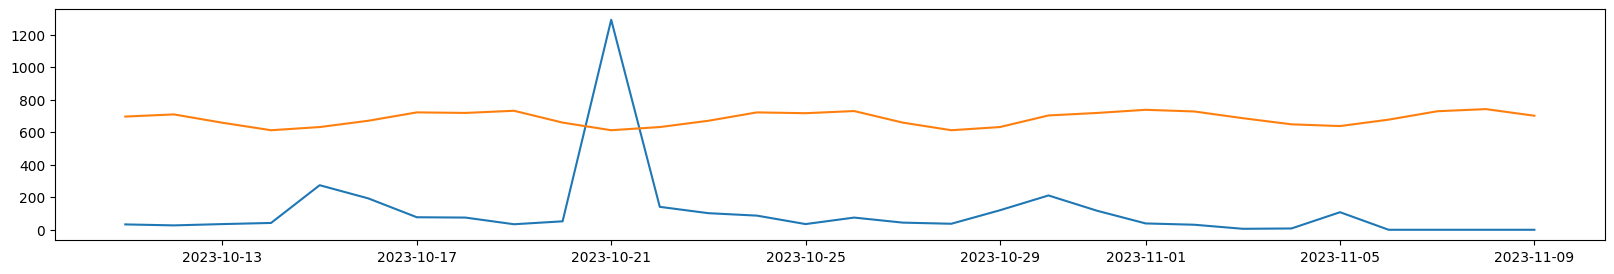

In [12]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,3))
ax.plot(test[target_column])
ax.plot(prediction.forecast)

RMSE of results

In [13]:
test[target_column].mean()
rmse=sqrt(mean_squared_error(prediction.forecast,test[target_column]))
print(rmse)


624.7519269344699
